### Business Problem

A US-based housing company `Surprise Housing `
- has decided to enter the Australian market.
- Wants to use data analytics to  purchase at prices below their actual values and flip at a higher price. 
- For analysis the company has collected a data set from the sale of houses in Australia.
 

The company is looking at prospective properties to buy to enter the market. 
#### We have to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.



### Business Goal 

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [203]:
# reading the data
train = pd.read_csv(r"C:\Users\ajaya\Documents\ML C42\Advanced Regression Assignment\train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [204]:
#Let's look at the columns and rows
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [205]:
train.shape

(1460, 81)

#### there are 81 Columns, 1460 Rows
 - There are some columns with many null values(Alley, PoolQC, Fence etc. )
 - Some have NaN so may not have been read correctly(PoolQC	Fence	MiscFeature etc.)

In [206]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [207]:
#Let's look at missing values
print (round((train.isnull().sum() * 100/ len(train)),2).sort_values(ascending=False))


PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64


In [208]:
# Some columns have > 80% missing values, will drop these
# PoolQC         99.52
# MiscFeature    96.30
# Alley          93.77
# Fence          80.75

print(train['PoolQC'].value_counts(), '\n')
print(train['MiscFeature'].value_counts(), '\n')
print(train['Alley'].value_counts(), '\n')
print(train['Fence'].value_counts(), '\n')

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64 

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64 

Grvl    50
Pave    41
Name: Alley, dtype: int64 

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64 



In [209]:
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'],inplace=True)

In [210]:
train.shape

(1460, 77)

In [211]:
#Let's look at missing value %ages
print (round((train.isnull().sum() * 100/ len(train)),2).sort_values(ascending=False))

#FireplaceQu has approx 50% missing, may have to drop it

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00
Length: 77, dtype: float64


In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [213]:
print(train['FireplaceQu'].value_counts(), '\n')
print(train['LotFrontage'].value_counts(), '\n')
print(train['GarageQual'].value_counts(), '\n')
print(train['GarageCond'].value_counts(), '\n')     
print(train['MasVnrType'].value_counts(), '\n')     
print(train['MasVnrArea'].value_counts(), '\n')     


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64 



In [214]:
train[['MSSubClass', 'OverallQual', 'OverallCond', 'GarageYrBlt', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   OverallCond   1460 non-null   int64  
 3   GarageYrBlt   1379 non-null   float64
 4   MoSold        1460 non-null   int64  
 5   YrSold        1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.4 KB


In [215]:
#Fixing data type, categorical stored as numeric
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('object')
train['MoSold'] = train['MoSold'].astype('object')
train['YrSold'] = train['YrSold'].astype('object')
train['YearBuilt'] = train['YearBuilt'].astype('object')
train['YearRemodAdd'] = train['YearRemodAdd'].astype('object')

train[['MSSubClass', 'OverallQual', 'OverallCond', 'GarageYrBlt', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   OverallQual   1460 non-null   object
 2   OverallCond   1460 non-null   object
 3   GarageYrBlt   1379 non-null   object
 4   MoSold        1460 non-null   object
 5   YrSold        1460 non-null   object
 6   YearBuilt     1460 non-null   object
 7   YearRemodAdd  1460 non-null   object
dtypes: object(8)
memory usage: 91.4+ KB


In [216]:
#drop the ID column
train.drop(columns=['Id'],inplace=True)

In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   object 
 18  YearRemo

In [218]:
# Lets look at numeric features in the data
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000


In [219]:
# Let's look at correlations 
correl = train_numeric.corr()
correl

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


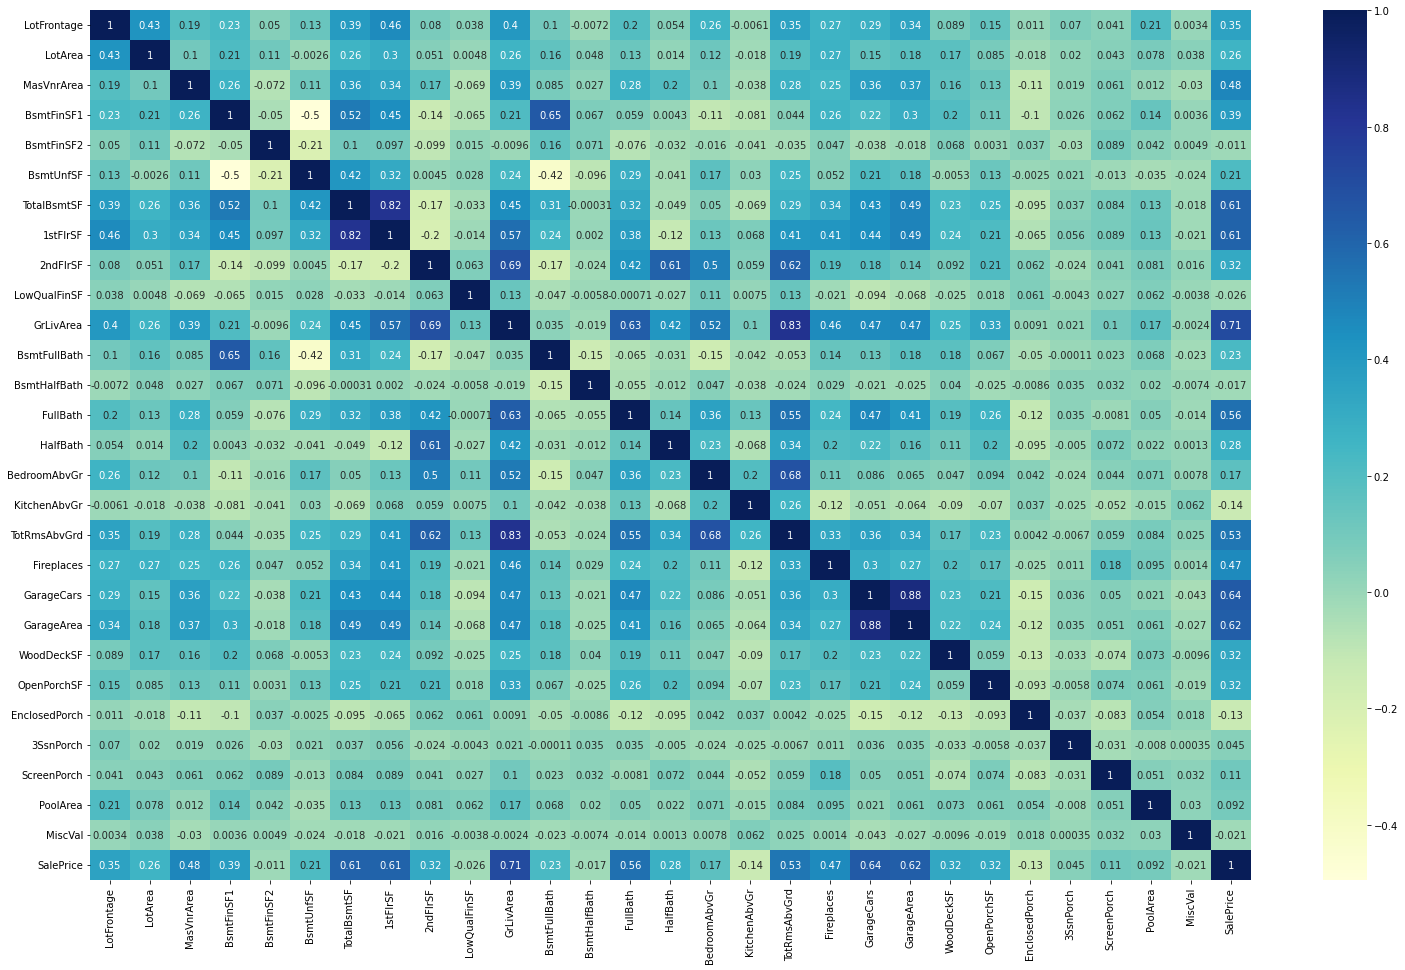

In [220]:
# correlation heatmap

plt.figure(figsize=(26,16))

# heatmap
sns.heatmap(correl, cmap="YlGnBu", annot=True)
plt.show()


#### Observations from the heatmap
Good Correlations with SalePrice
- GrLivArea  
- GarageCars, GarageArea
- TotalBsmtSF, 1stFlrSF
- FullBath, TotRmsAbvGrd

There is some Collinearity, especially in:
- GrLivArea & TotRmsAbvGrd
- TotRmsAbvGrd & BedroomAbvGr, 2ndFlrSF
- BsmtFullBath & BsmtFinSF1

In [221]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [222]:
train_numeric.describe()

# There are some outliers e.g. LotArea, 
# it will best to re-scale sata before modelling as scales are vastly diffrent across features

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

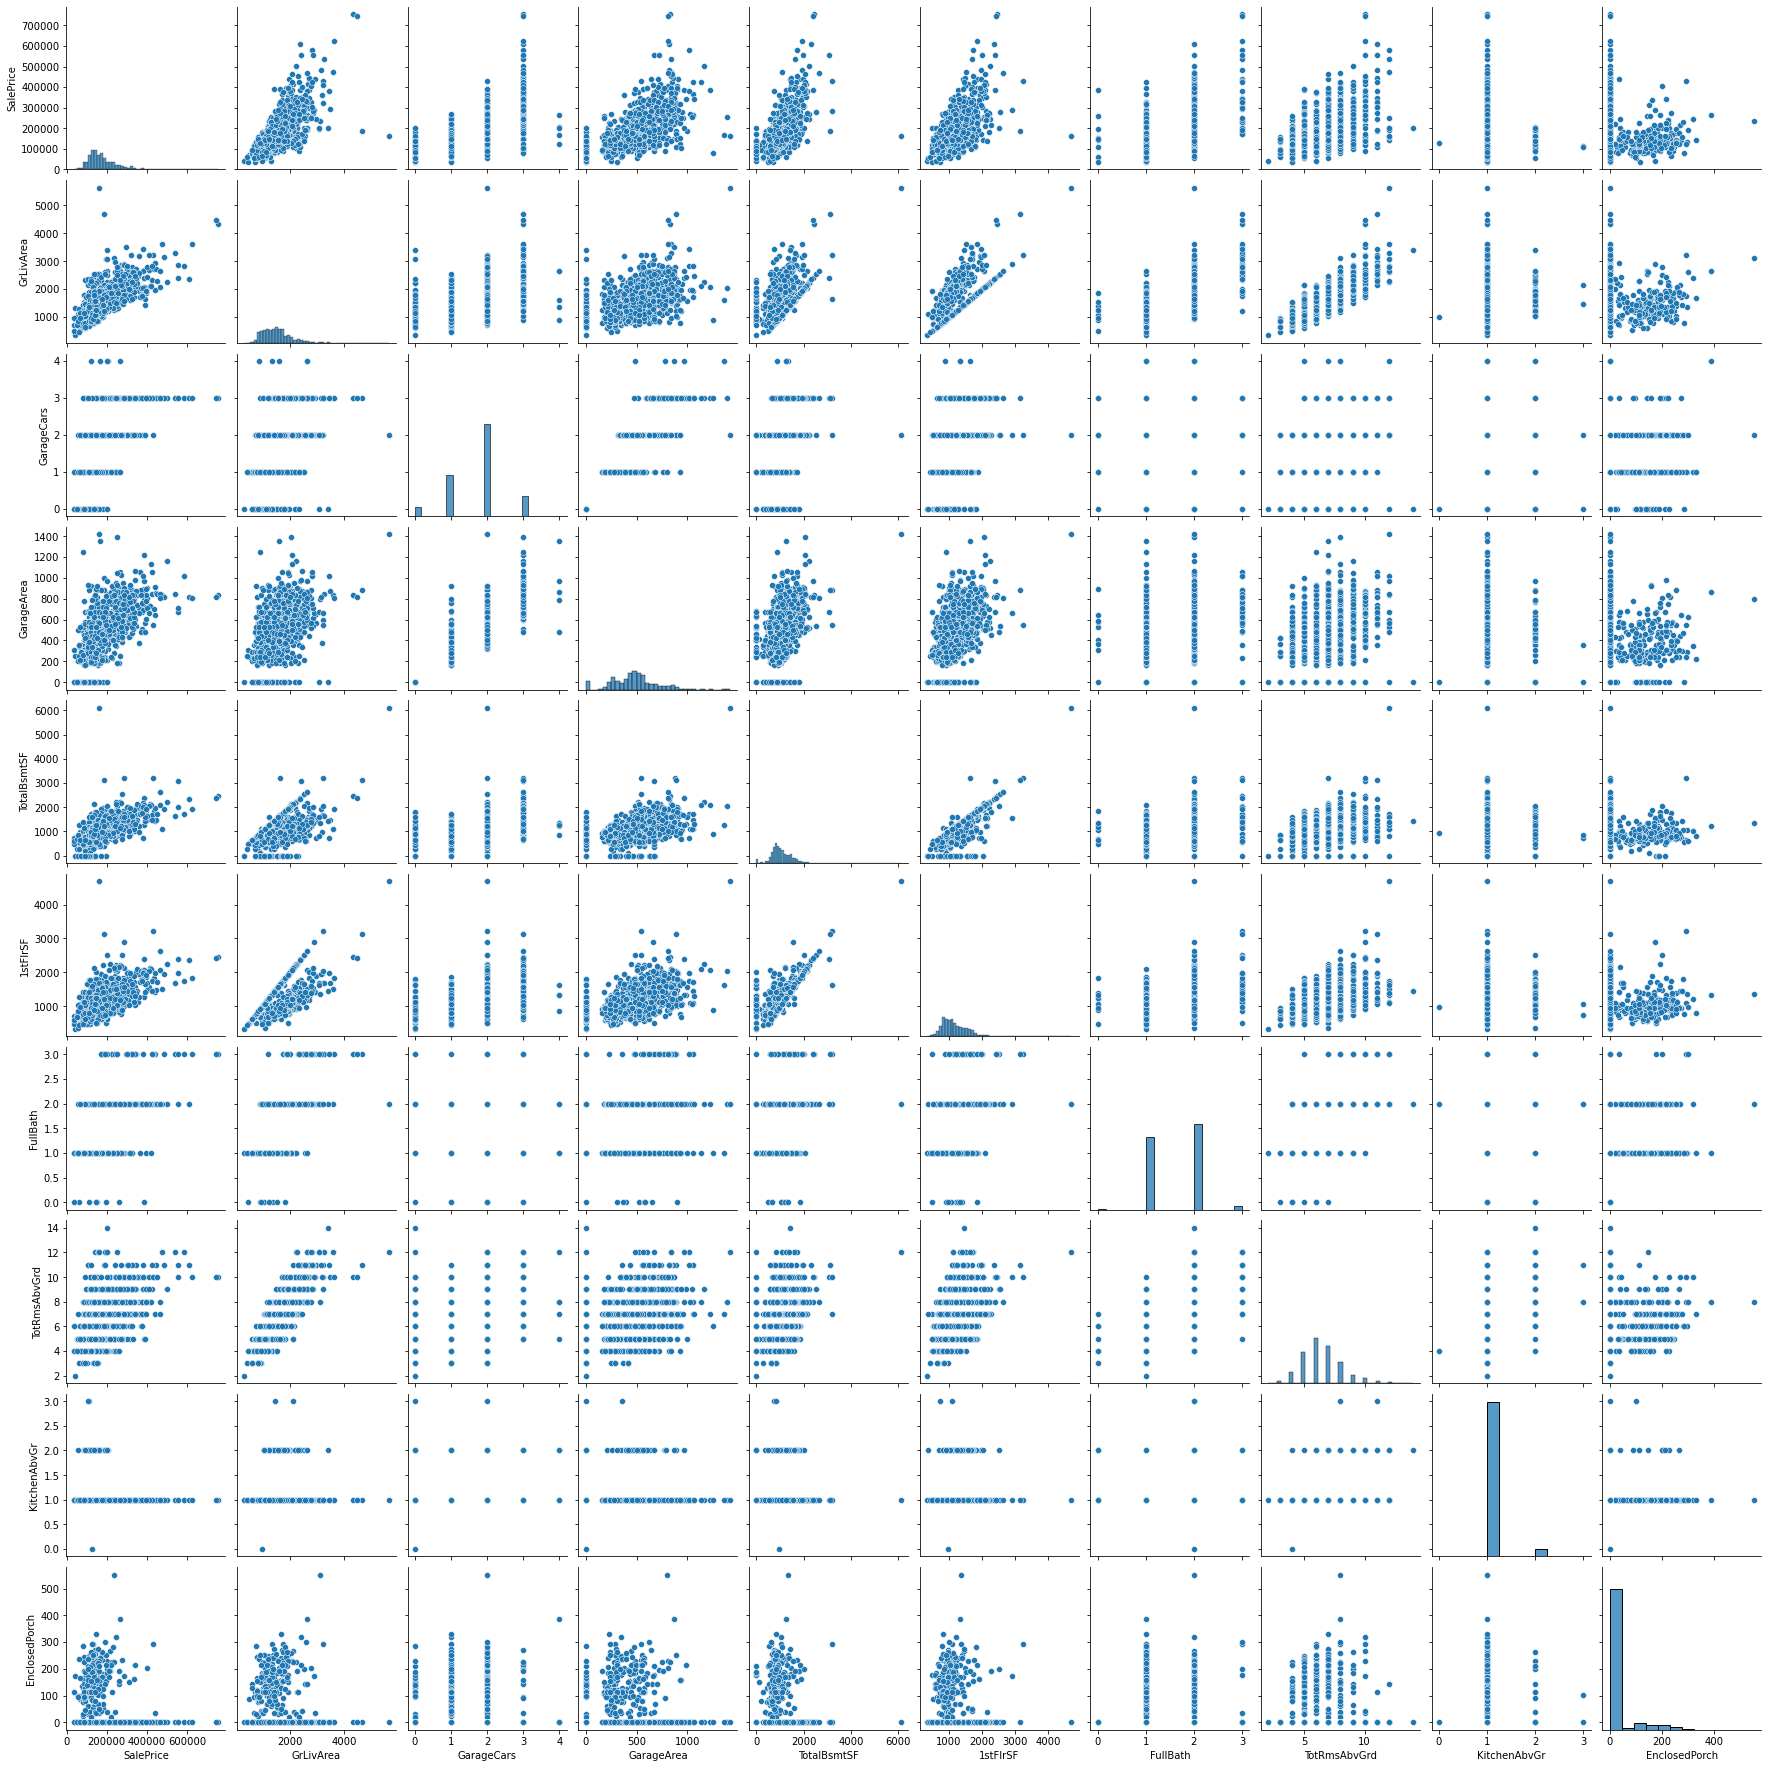

In [223]:
# let's look at relationship with Saleprice for Numeric variables
# KitchenAbvGr, EnclosedPorch have _ve correaltion with SalePrice but not strong
sns.pairplot(train_numeric[['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'KitchenAbvGr', 'EnclosedPorch']])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

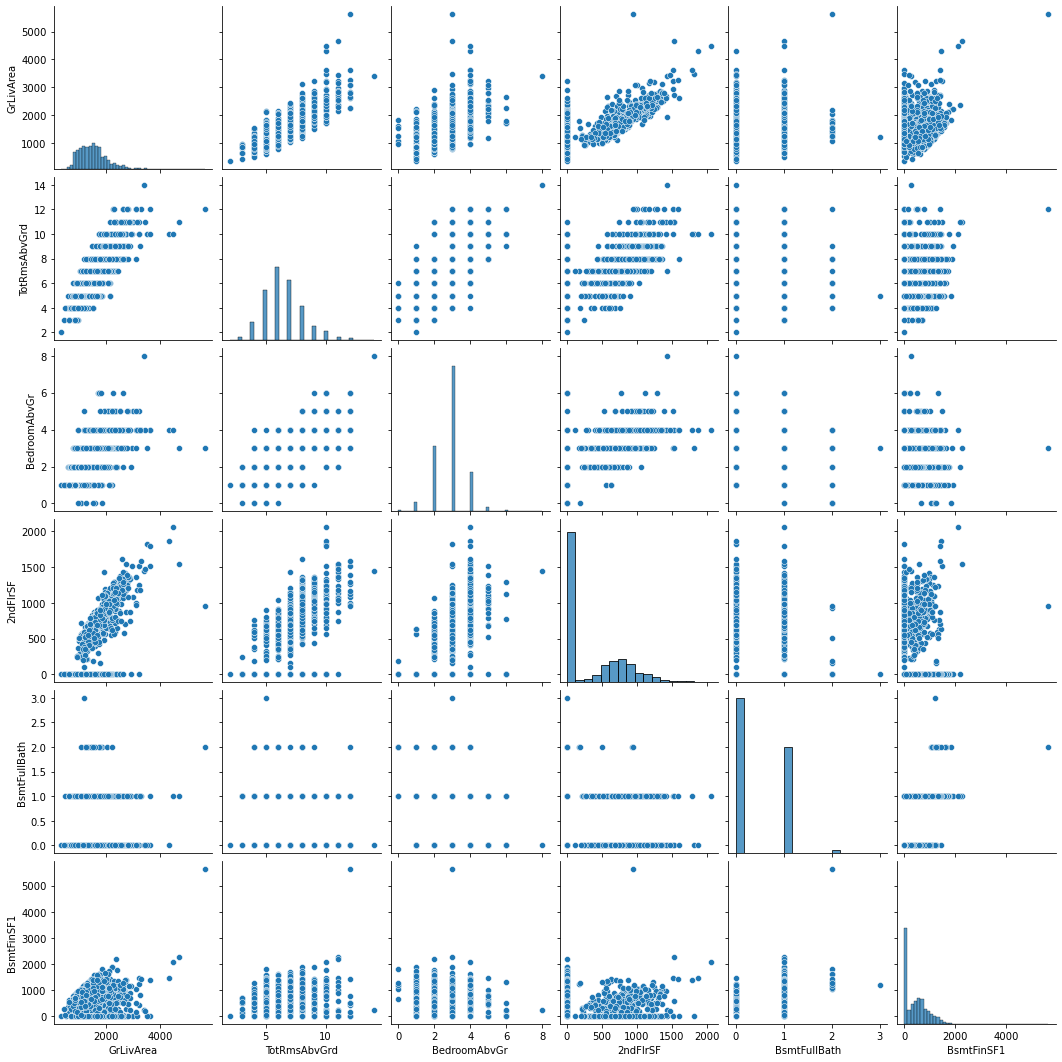

In [224]:
# Pair plots for Multicollinear variables
sns.pairplot(train_numeric[['GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', '2ndFlrSF', 'BsmtFullBath', 'BsmtFinSF1']])
plt.show

In [225]:
# Let's look at missing values again
print (round((train_numeric.isnull().sum() * 100/ len(train_numeric)),2).sort_values(ascending=False))

LotFrontage      17.74
MasVnrArea        0.55
BedroomAbvGr      0.00
MiscVal           0.00
PoolArea          0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
GarageArea        0.00
GarageCars        0.00
Fireplaces        0.00
TotRmsAbvGrd      0.00
KitchenAbvGr      0.00
HalfBath          0.00
LotArea           0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
1stFlrSF          0.00
TotalBsmtSF       0.00
BsmtUnfSF         0.00
BsmtFinSF2        0.00
BsmtFinSF1        0.00
SalePrice         0.00
dtype: float64


In [226]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [227]:
# These columns are missing, will need to be fixed after Test train Split
print(train_numeric['LotFrontage'].value_counts(), '\n')
print(train_numeric['MasVnrArea'].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [228]:
train_numeric[['LotFrontage', 'MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


In [229]:
# Lets look at Categorical features in the data
train_catg = train.select_dtypes(include=['object'])
train_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  YearBuilt      1460 non-null   object
 16  YearRemodAdd   1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

In [230]:
print (round((train_catg.isnull().sum() * 100/ len(train_catg)),2).sort_values(ascending=False))

FireplaceQu      47.26
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
GarageYrBlt       5.55
GarageType        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrType        0.55
Electrical        0.07
HeatingQC         0.00
Heating           0.00
MSSubClass        0.00
CentralAir        0.00
KitchenQual       0.00
Foundation        0.00
PavedDrive        0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional        0.00
ExterCond         0.00
MSZoning          0.00
ExterQual         0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl   

In [231]:
# also dropping FireplaceQu as it has almost 50% missing values
train_catg.drop(columns=['FireplaceQu'],inplace=True)
print (round((train_catg.isnull().sum() * 100/ len(train_catg)),2).sort_values(ascending=False))

GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
Electrical       0.07
HeatingQC        0.00
Heating          0.00
MSSubClass       0.00
CentralAir       0.00
KitchenQual      0.00
Foundation       0.00
PavedDrive       0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
Functional       0.00
ExterCond        0.00
MSZoning         0.00
ExterQual        0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
SaleCondit

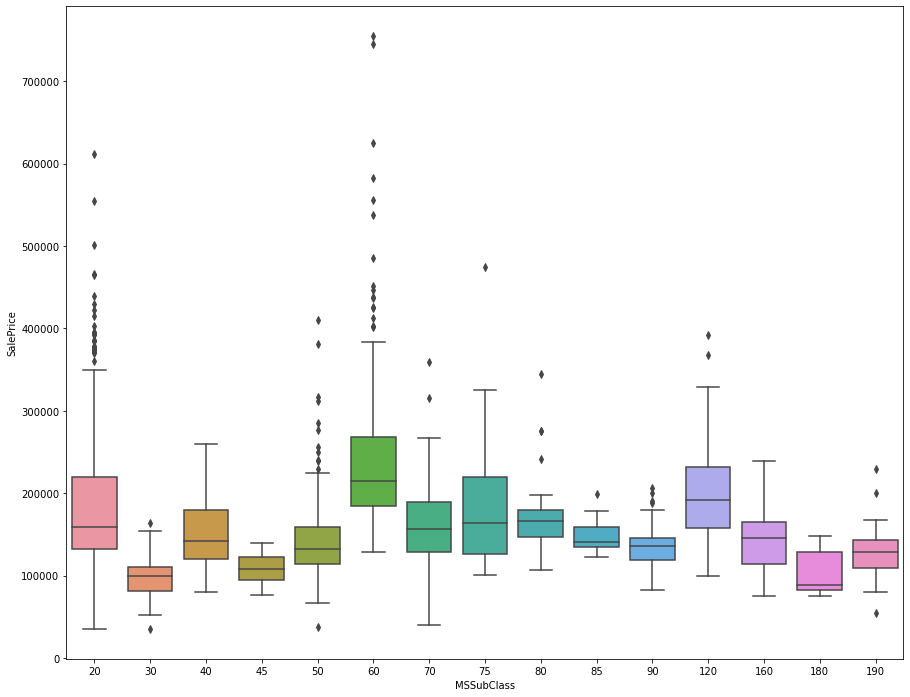

In [232]:
# Box Plot for SalePrice by MSSubClass
plt.figure(figsize=(15, 12))
sns.boxplot(x='MSSubClass', y='SalePrice', data = train)
plt.show()

# 20 'STORY 1946 & NEWER ALL STYLES' (20 -50),
# 60 '2-STORY 1946 & NEWER' (60 - 90) &
# 120 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER' (120 - 190)
# These seem to have higher price than other similar types

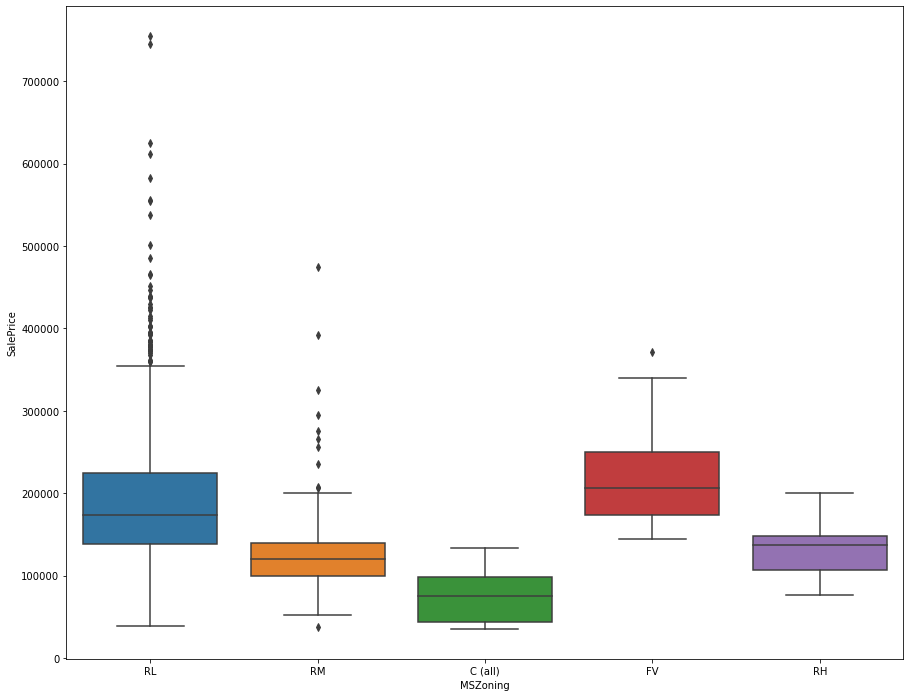

In [233]:
# Box Plot for SalePrice by MSZoning
plt.figure(figsize=(15, 12))
sns.boxplot(x='MSZoning', y='SalePrice', data = train)
plt.show()

# FV 'Floating Village Residential' &  RL 'Residential Low Density', Lower density housing have higher 
#      prices which shd be expected they will be more premium
# Many outliers in RL & RM, can hopefully be explained using other Features

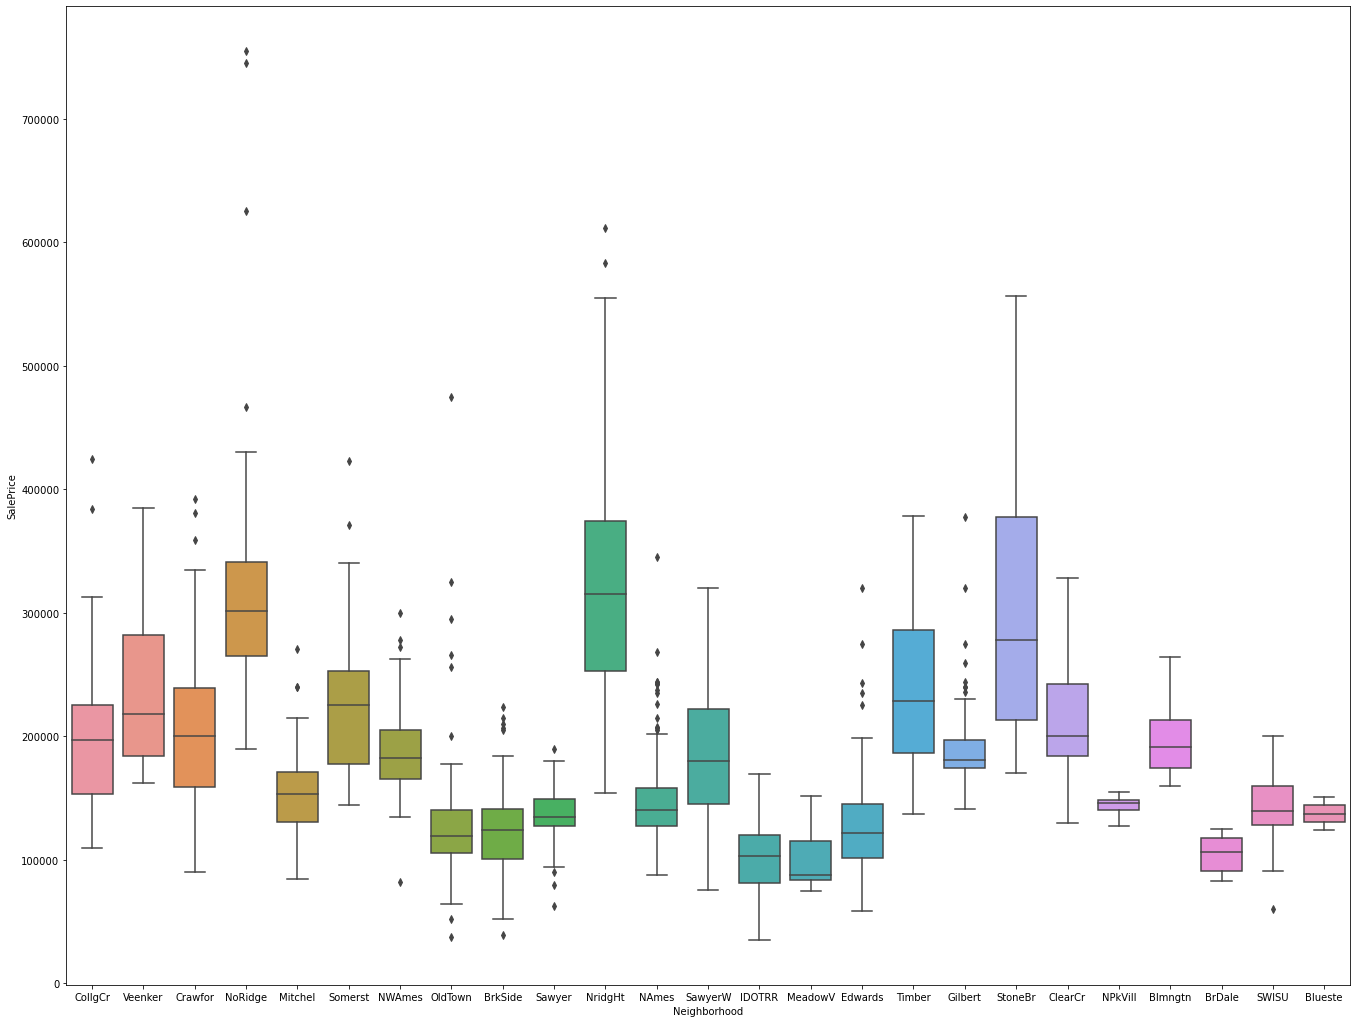

In [234]:
# Box Plot for SalePrice by Neighborhood
plt.figure(figsize=(23, 18))
sns.boxplot(x='Neighborhood', y='SalePrice', data = train)
plt.show()


# Some neighborhoods command higher prices apparently the Posh/ Tony areas
# NoRidge 'Northridge', NridgHt 'Northridge Heights' , StoneBr 'Stone Brook'
# Somerst 'Somerset', Timber 'Timberland', Veenker 'Veenker'

#On The other hand some e.g  IDOTRR 'Iowa DOT and Rail Road' & MeadowV 'Meadow Village' command much lower prices

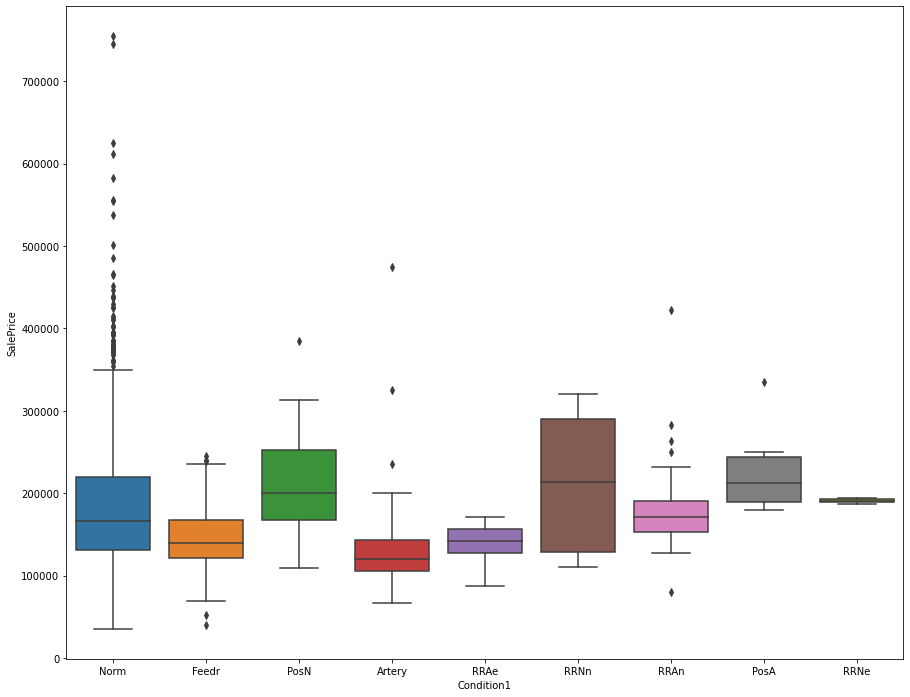

In [235]:
# Box Plot for SalePrice by Condition1
plt.figure(figsize=(15, 12))
sns.boxplot(x='Condition1', y='SalePrice', data = train)
plt.show()

# Note:       PosN 'Near positive off-site feature--park, greenbelt, etc.'
#             PosA 'Adjacent to postive off-site feature'

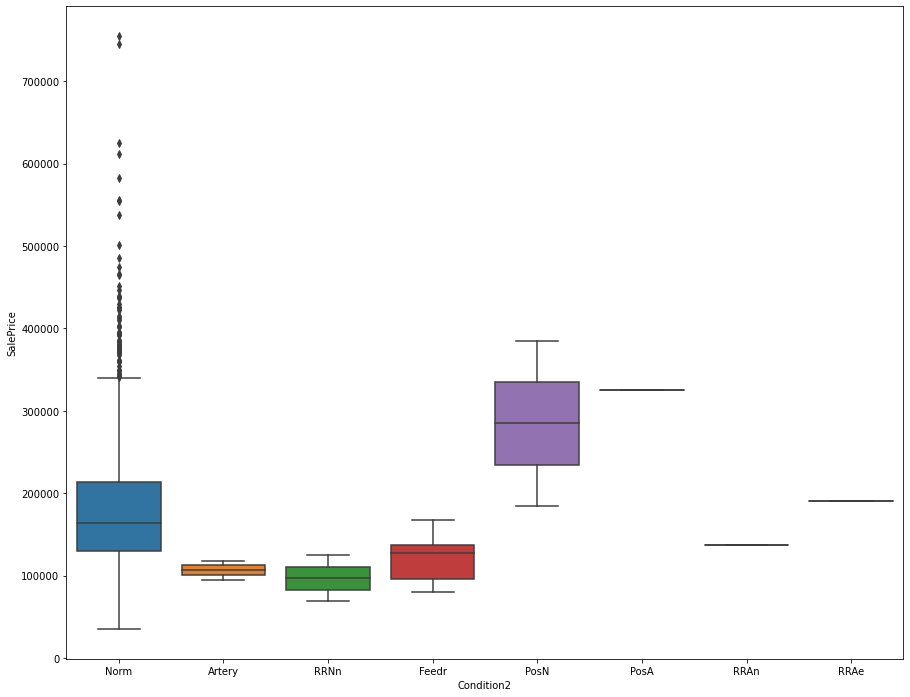

In [236]:
# Box Plot for SalePrice by Condition2
plt.figure(figsize=(15, 12))
sns.boxplot(x='Condition2', y='SalePrice', data = train)
plt.show()

# Again Note: PosN 'Near positive off-site feature--park, greenbelt, etc.'
#             PosA 'Adjacent to postive off-site feature'

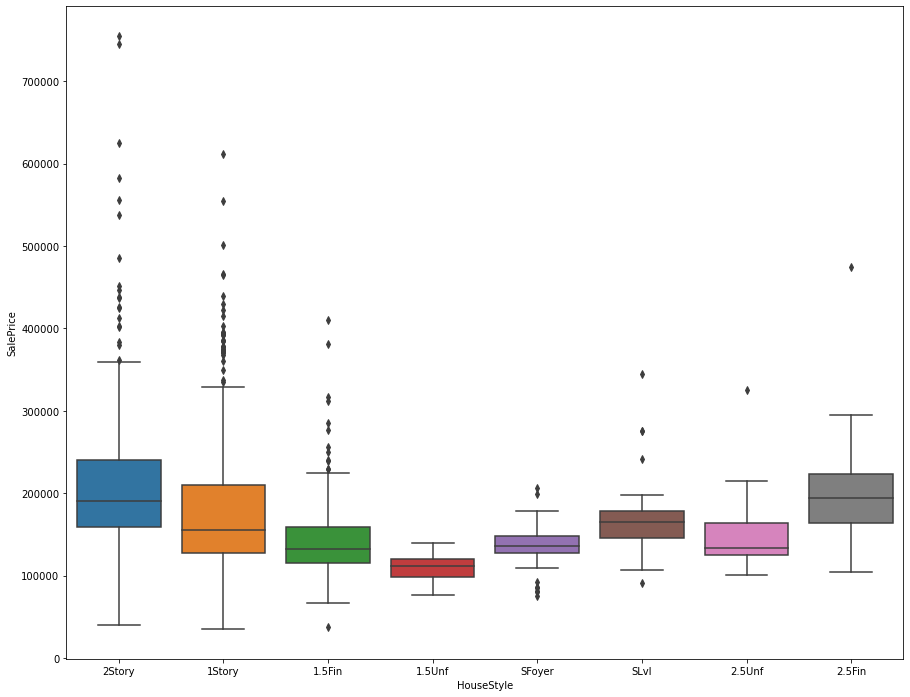

In [237]:
# Box Plot for SalePrice by HouseStyle
plt.figure(figsize=(15, 12))
sns.boxplot(x='HouseStyle', y='SalePrice', data = train)
plt.show()

# Note: 2.5Fin 'Two and one-half story: 2nd level finished'
#       1Story 'One story'
#       2Story 'Two story'

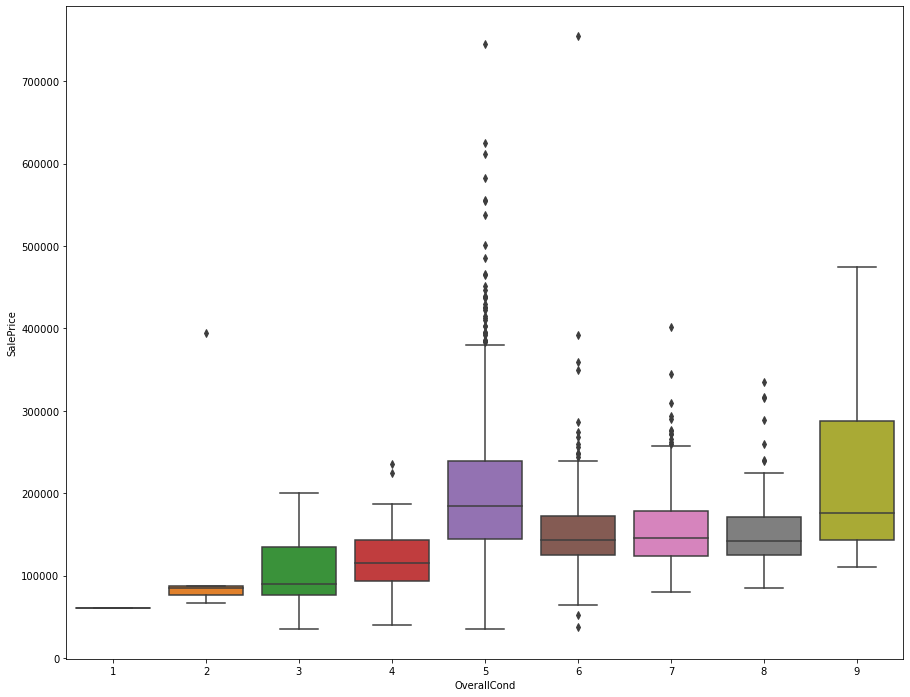

In [238]:
# Box Plot for SalePrice by OverallCond
plt.figure(figsize=(15, 12))
sns.boxplot(x='OverallCond', y='SalePrice', data = train)
plt.show()

# Note:  9 'Excellent'
#        5 'Average'

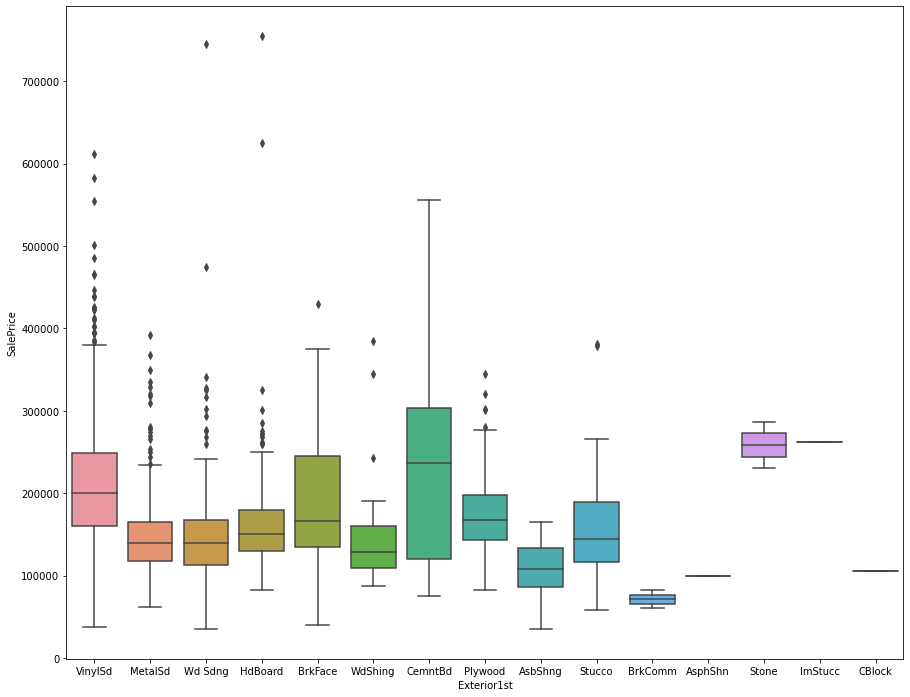

In [239]:
# Box Plot for SalePrice by Exterior1st
plt.figure(figsize=(15, 12))
sns.boxplot(x='Exterior1st', y='SalePrice', data = train)
plt.show()

# Note:  Stone


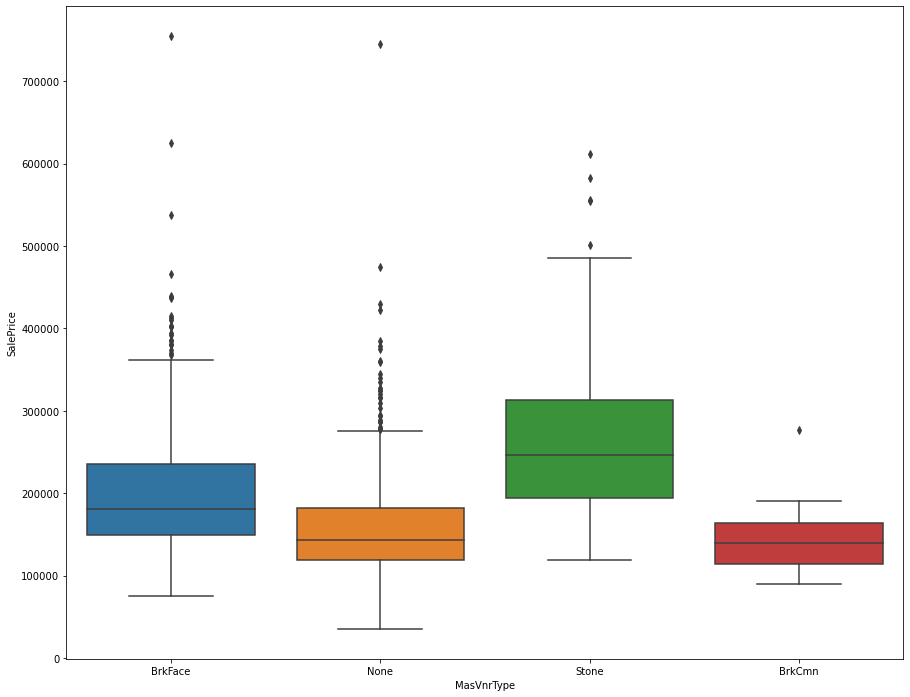

In [240]:
# Box Plot for SalePrice by MasVnrType
plt.figure(figsize=(15, 12))
sns.boxplot(x='MasVnrType', y='SalePrice', data = train)
plt.show()

# Note:  Masonry veneer type = Stone, command higher price


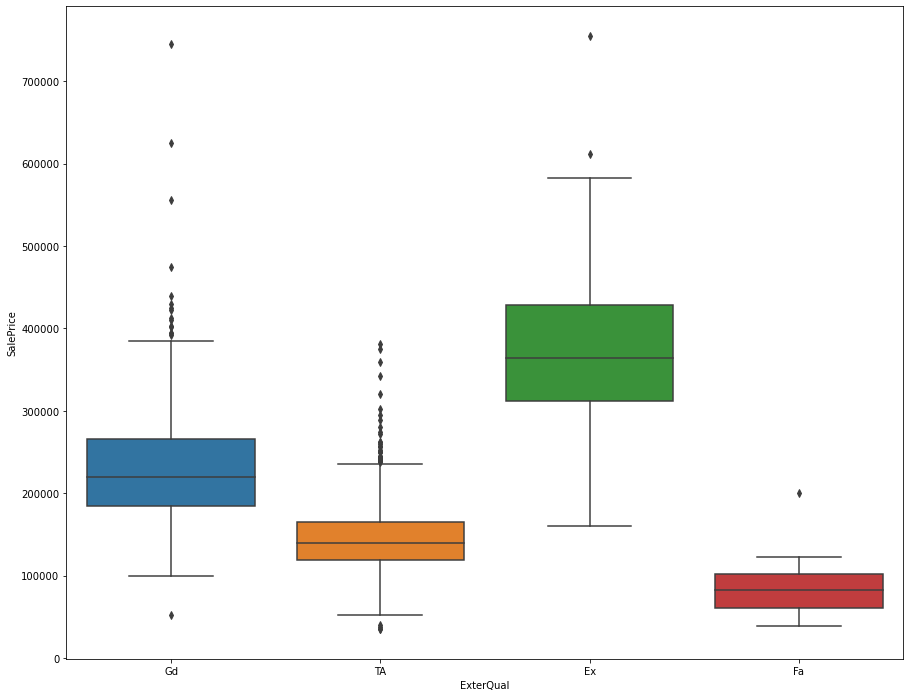

In [241]:
# Box Plot for SalePrice by ExterQual: present condition of the material on the exterior
plt.figure(figsize=(15, 12))
sns.boxplot(x='ExterQual', y='SalePrice', data = train)
plt.show()

# Note:         Ex 'Excellent' followed by  Gd 'Good'

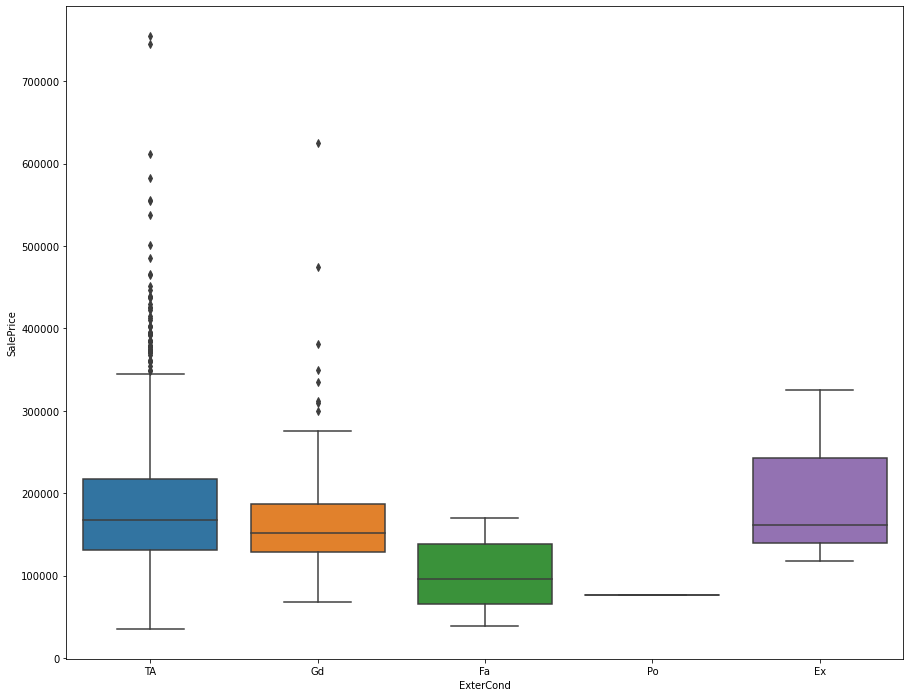

In [242]:
# Box Plot for SalePrice by ExterCond
plt.figure(figsize=(15, 12))
sns.boxplot(x='ExterCond', y='SalePrice', data = train)
plt.show()

# Note:         Ex 'Excellent',  TA 'Average/Typical'


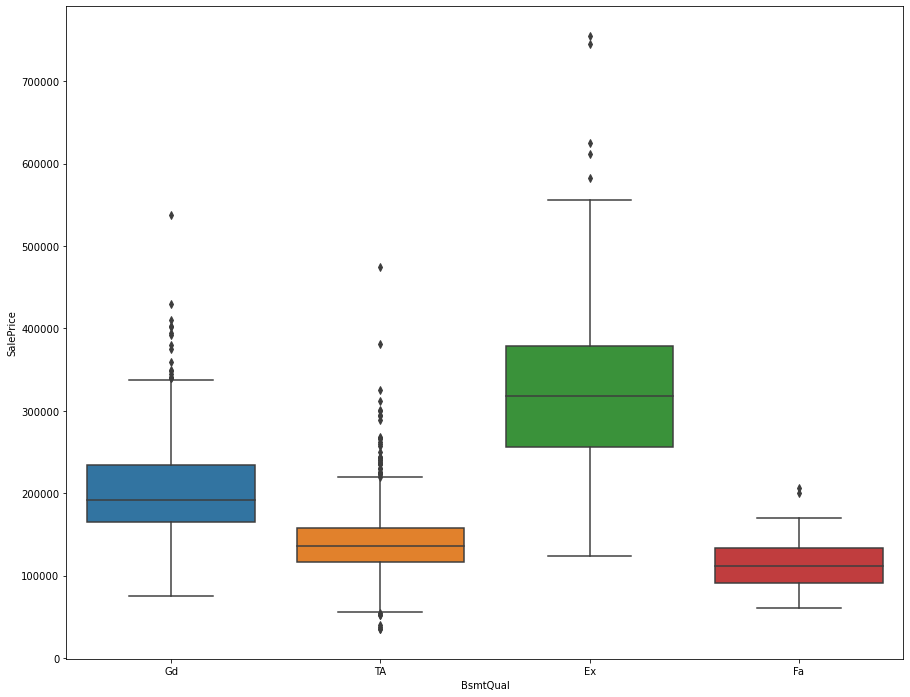

In [243]:
# Box Plot for SalePrice by BsmtQual:the height of the basement
plt.figure(figsize=(15, 12))
sns.boxplot(x='BsmtQual', y='SalePrice', data = train)
plt.show()

# Note:         Ex 'Excellent' (100+ inches), followed by  Gd 'Good' (90-99 inches)


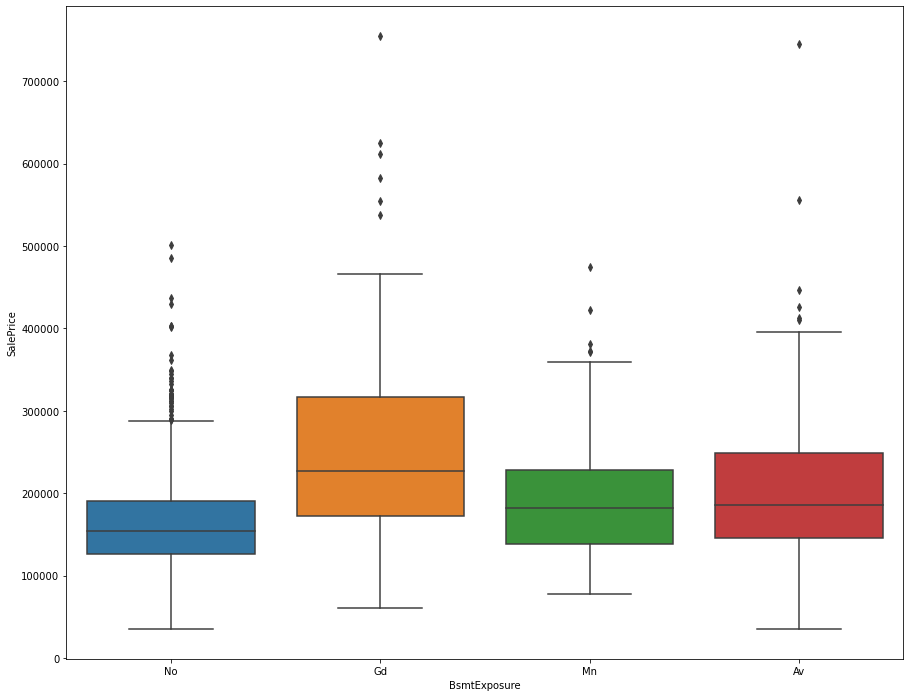

In [244]:

# Box Plot for SalePrice by BsmtExposure: Refers to walkout or garden level walls
plt.figure(figsize=(15, 12))
sns.boxplot(x='BsmtExposure', y='SalePrice', data = train)
plt.show()

# Note:        Gd: Good Exposure


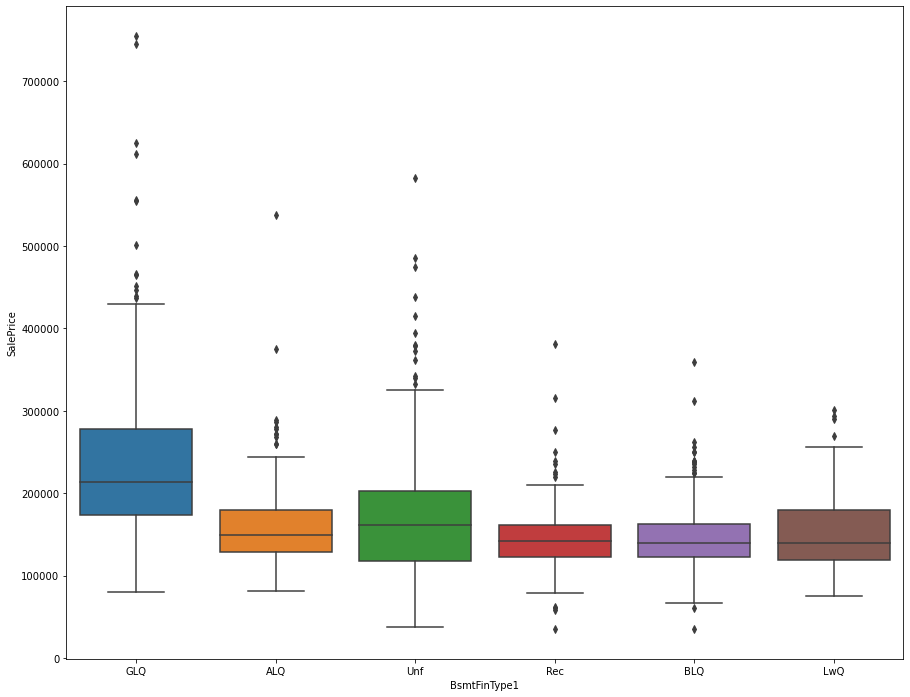

In [245]:
# Box Plot for SalePrice by BsmtFinType1: Rating of basement finished area
plt.figure(figsize=(15, 12))
sns.boxplot(x='BsmtFinType1', y='SalePrice', data = train)
plt.show()

# Note:       GLQ 'Good Living Quarters'


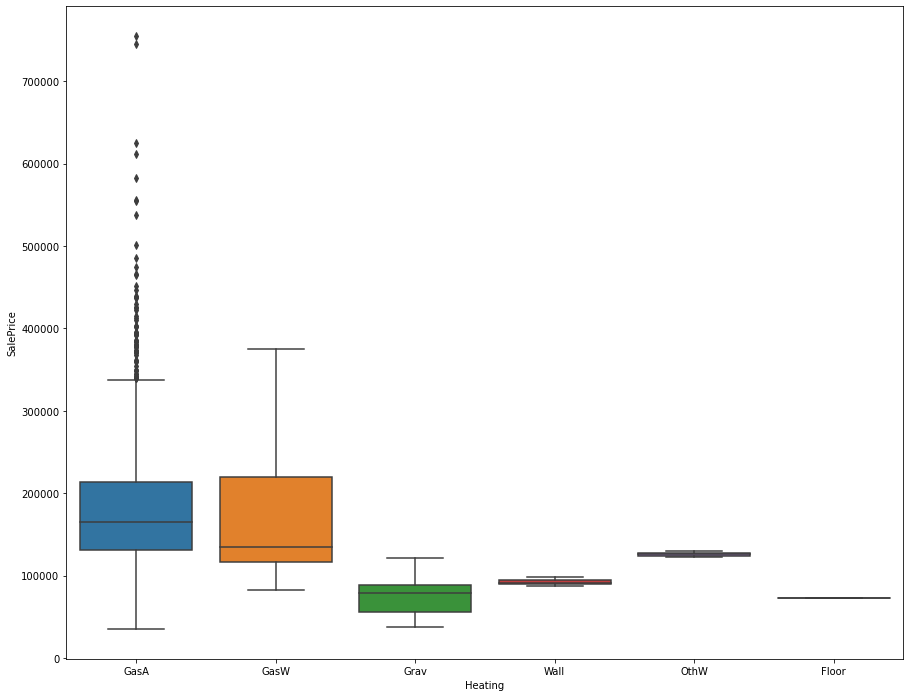

In [246]:
# Box Plot for SalePrice by Heating: Type of heating
plt.figure(figsize=(15, 12))
sns.boxplot(x='Heating', y='SalePrice', data = train)
plt.show()

# Note: GasA 'Gas forced warm air furnace' &  GasW 'Gas hot water or steam heat' 
# Command Higher prices


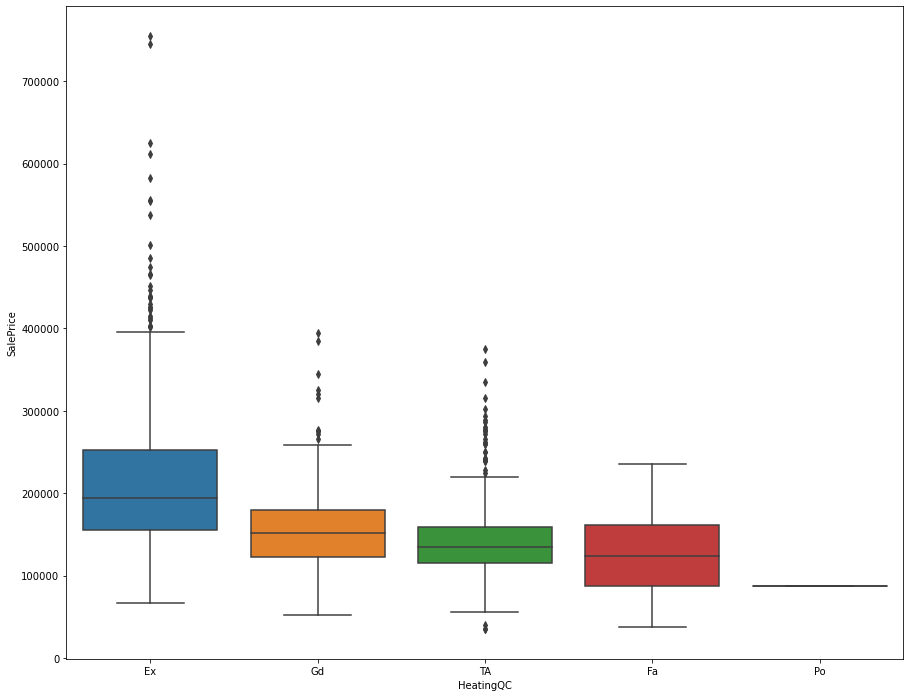

In [247]:
# Box Plot for SalePrice by HeatingQC: Heating quality and condition
plt.figure(figsize=(15, 12))
sns.boxplot(x='HeatingQC', y='SalePrice', data = train)
plt.show()

# Note: Ex: Excellent
# Command Higher prices


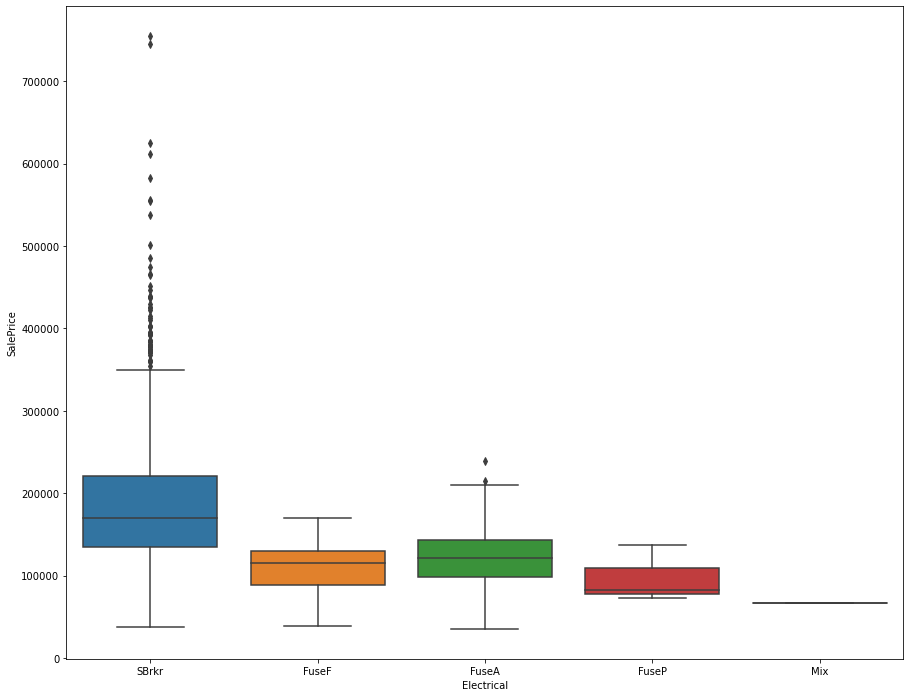

In [248]:
# Box Plot for SalePrice by Electrical: Electrical system
plt.figure(figsize=(15, 12))
sns.boxplot(x='Electrical', y='SalePrice', data = train)
plt.show()

# Note:  SBrkr 'Standard Circuit Breakers & Romex'
# Command Higher prices


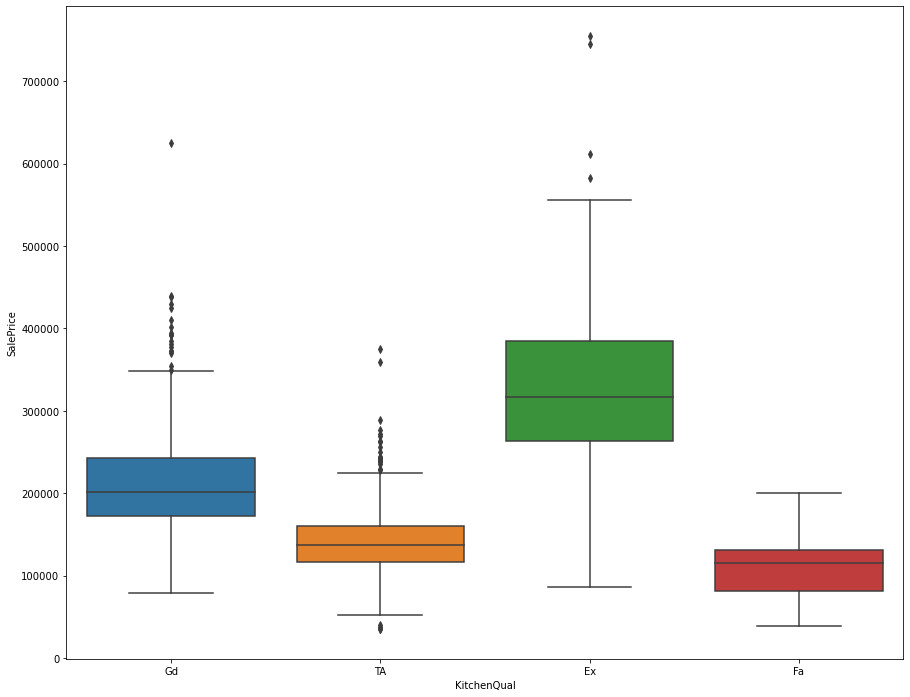

In [249]:
# Box Plot for SalePrice by KitchenQual: Kitchen quality
plt.figure(figsize=(15, 12))
sns.boxplot(x='KitchenQual', y='SalePrice', data = train)
plt.show()

# Note:   Ex 'Excellent'
# Command Higher prices


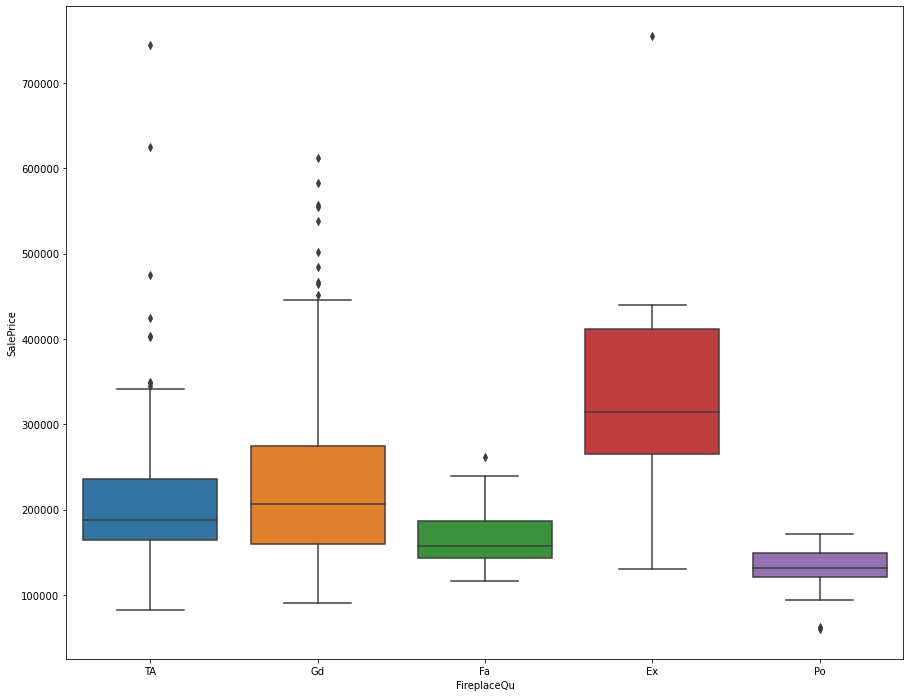

In [250]:
# Box Plot for SalePrice by FireplaceQu: Fireplace quality
plt.figure(figsize=(15, 12))
sns.boxplot(x='FireplaceQu', y='SalePrice', data = train)
plt.show()

# Note:   Ex 'Excellent'
# Command Higher prices, but outliers in TA, Gd


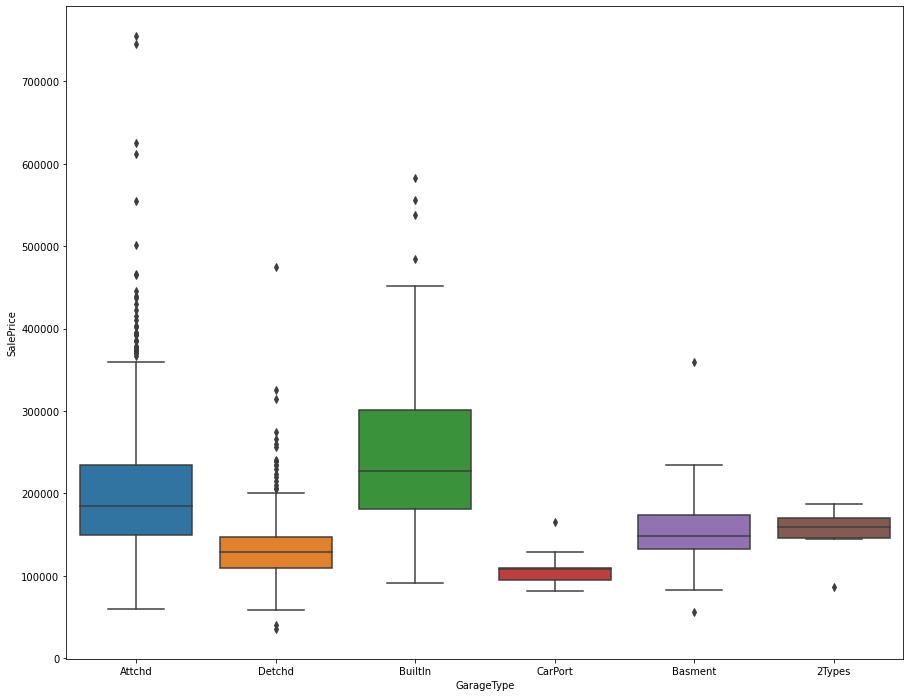

In [251]:
# Box Plot for SalePrice by GarageType: Garage location
plt.figure(figsize=(15, 12))
sns.boxplot(x='GarageType', y='SalePrice', data = train)
plt.show()

# Note:  Attchd 'Attached to home', BuiltIn 'Built-In (Garage part of house - typically has room above garage)''
# Command Higher prices


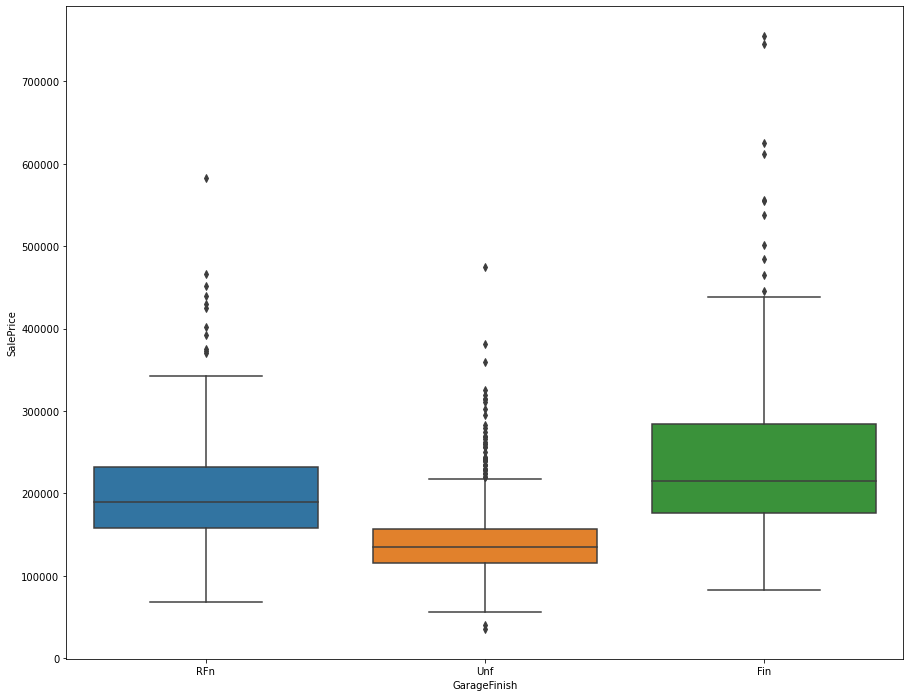

In [252]:
# Box Plot for SalePrice by GarageFinish: Interior finish of the garage
plt.figure(figsize=(15, 12))
sns.boxplot(x='GarageFinish', y='SalePrice', data = train)
plt.show()

# Note:  Unf 'Unfinished'
# Command Lower prices


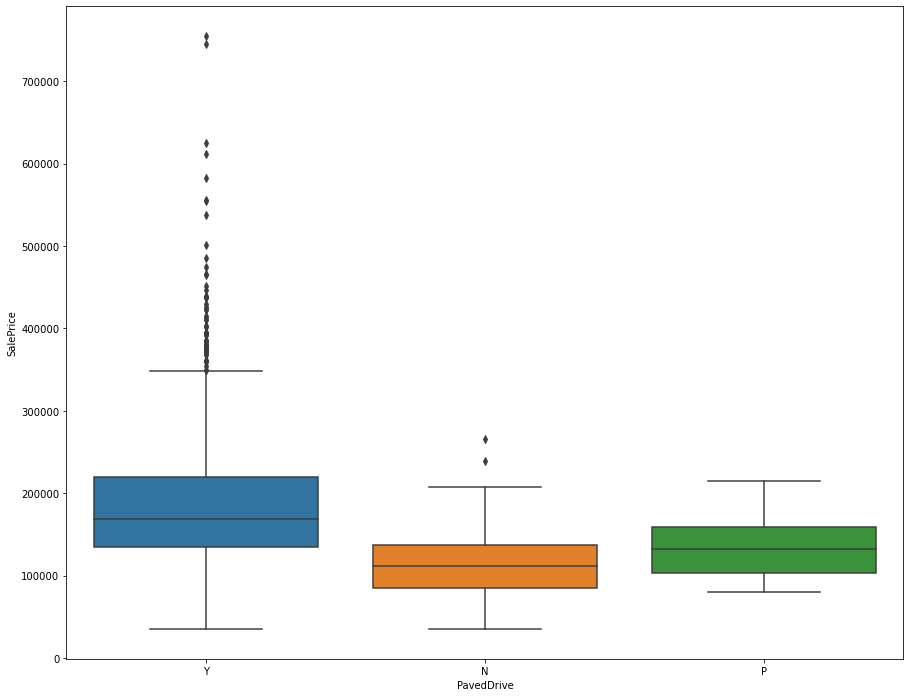

In [253]:
# Box Plot for SalePrice by PavedDrive: Paved driveway
plt.figure(figsize=(15, 12))
sns.boxplot(x='PavedDrive', y='SalePrice', data = train)
plt.show()

# Note:  Y 'Paved '
# Commands Higher prices


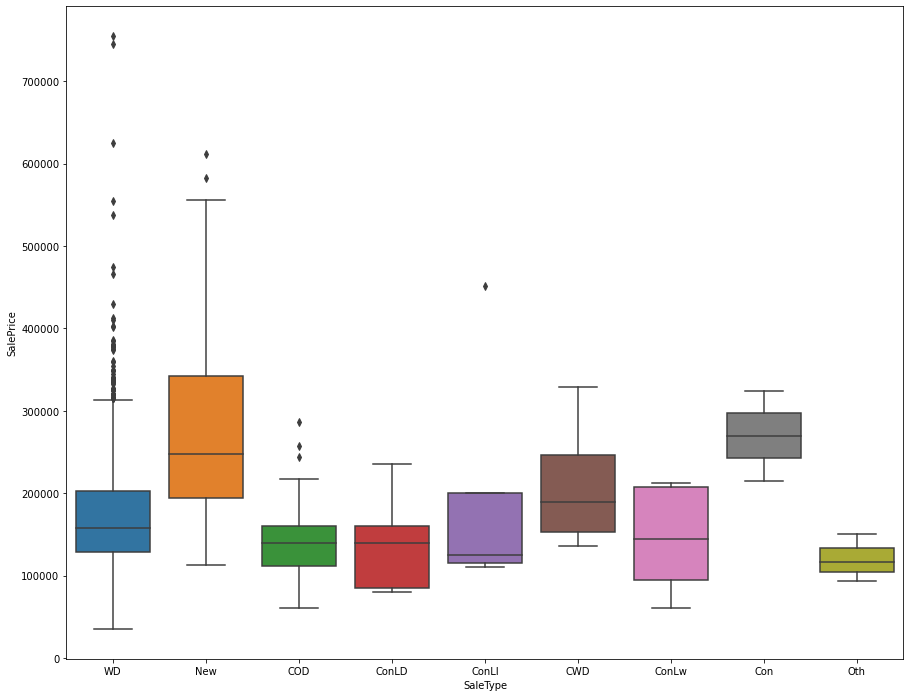

In [254]:
# Box Plot for SalePrice by SaleType: Type of sale
plt.figure(figsize=(15, 12))
sns.boxplot(x='SaleType', y='SalePrice', data = train)
plt.show()

# Note:  New 'Home just constructed and sold', Con 'Contract 15% Down payment regular terms'
# Command Higher prices


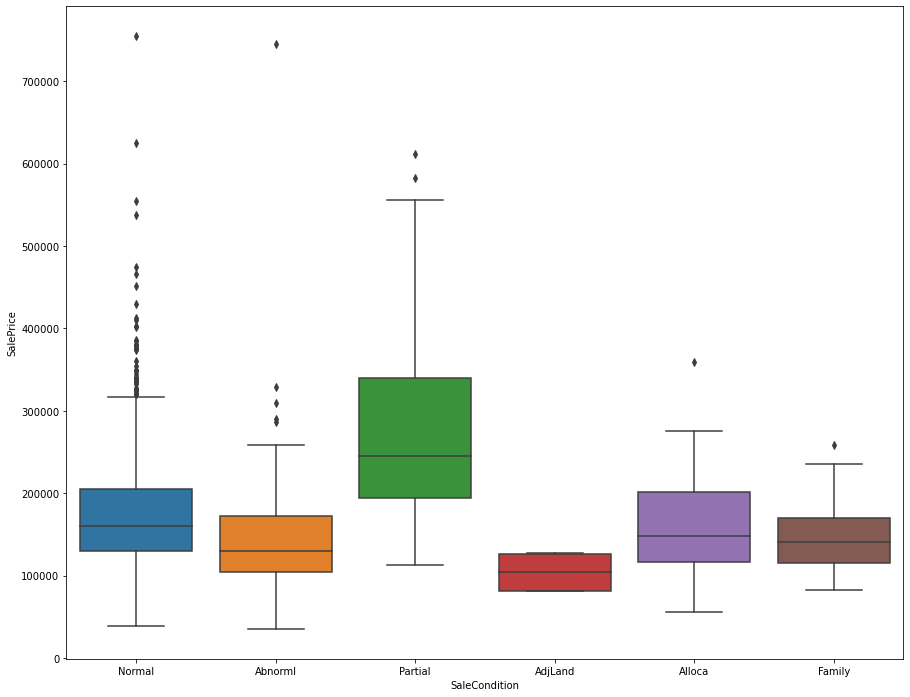

In [255]:
# Box Plot for SalePrice by SaleCondition: Condition of sale
plt.figure(figsize=(15, 12))
sns.boxplot(x='SaleCondition', y='SalePrice', data = train)
plt.show()

# Note:  Partial 'Home was not completed when last assessed (associated with New Homes)''
# Command Higher prices
  

## EDA Notes for categorical features

MSSubClass:
#### 20 'STORY 1946 & NEWER ALL STYLES' (20 -50),
#### 60 '2-STORY 1946 & NEWER' (60 - 90) &
#### 120 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER' (120 - 190)
***************************************************************************************************

MSZoning:
#### FV 'Floating Village Residential' &  RL 'Residential Low Density', Lower density housing have higher 
####      prices which shd be expected they will be more premium
#### Many outliers in RL & RM
***************************************************************************************************

Neighborhood:

#### Some neighborhoods command higher prices apparently the Posh/ Tony areas
#### NoRidge 'Northridge', NridgHt 'Northridge Heights' , StoneBr 'Stone Brook'
#### Somerst 'Somerset', Timber 'Timberland', Veenker 'Veenker'
#### On The other hand some e.g  IDOTRR 'Iowa DOT and Rail Road' & MeadowV 'Meadow Village' command much lower prices
***************************************************************************************************

HouseStyle:

#### Note: 2.5Fin 'Two and one-half story: 2nd level finished'
####       1Story 'One story'
####       2Story 'Two story'

***************************************************************************************************
Heating:

#### Note: GasA 'Gas forced warm air furnace' &  GasW 'Gas hot water or steam heat' 
#### Command Higher prices
***************************************************************************************************
HeatingQC:
#### Note: Ex: Excellent
#### Command Higher prices
***************************************************************************************************
Electrical:

#### Note:  SBrkr 'Standard Circuit Breakers & Romex'
#### Command Higher prices

***************************************************************************************************
KitchenQual:
#### Note:   Ex 'Excellent'
#### Command Higher prices
***************************************************************************************************
FireplaceQu:
#### Note:   Ex 'Excellent'
#### Command Higher prices, but outliers in TA, Gd
***************************************************************************************************
GarageType:

#### Note:  Attchd 'Attached to home', BuiltIn 'Built-In (Garage part of house - typically has room above garage)''
#### Command Higher prices
***************************************************************************************************
GarageFinish:

#### Note:  Unf 'Unfinished'
#### Command Lower prices
***************************************************************************************************
PavedDrive:
#### Note:  Y 'Paved '
#### Commands Higher prices
***************************************************************************************************
SaleType:
#### Note:  New 'Home just constructed and sold', Con 'Contract 15% Down payment regular terms'
#### Command Higher prices
***************************************************************************************************

***************************************************************************************************
Condition2:

#### Again Note: PosN 'Near positive off-site feature--park, greenbelt, etc.'
####             PosA 'Adjacent to postive off-site feature'

***************************************************************************************************
OverallCond:

#### Note:  9 'Excellent'
####        5 'Average'

***************************************************************************************************
MasVnrType:

#### Note:  Masonry veneer type = Stone, command higher price

***************************************************************************************************
ExterQual:

#### Note:         Ex 'Excellent' followed by  Gd 'Good'

***************************************************************************************************
BsmtQual:

#### Note:         Ex 'Excellent' (100+ inches), followed by  Gd 'Good' (90-99 inches)
***************************************************************************************************
BsmtFinType1:

#### Note:       GLQ 'Good Living Quarters'
***************************************************************************************************


***************************************************************************************************
Condition1:
#### Note:       PosN 'Near positive off-site feature--park, greenbelt, etc.'
####             PosA 'Adjacent to postive off-site feature'


In [256]:
# Create dummy vars - one hot encoding
print(train_catg.head())
train_catg_dum = pd.get_dummies(train_catg, drop_first=True)
print(train_catg_dum.head())

  MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... GarageType GarageYrBlt GarageFinish  \
0       Gtl      CollgCr       Norm  ...     Attchd      2003.0          RFn   
1       Gtl      Veenker      Feedr  ...     Attchd      1976.0          RFn   
2       Gtl      CollgCr       Norm  ...     Attchd      2001.0          RFn   
3       Gtl      Crawfor       Norm  ...     Detchd      1998.0          Unf   
4       Gtl      NoRidge       Norm  ...     Attchd      2000.0          RFn   

  GarageQual GarageCond PavedDrive MoSold YrSold SaleType SaleCondition  
0     

In [257]:
train_catg_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [258]:
train_final = pd.concat([train_numeric, train_catg_dum], axis=1)
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 538 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(27), uint8(509)
memory usage: 1.0 MB


In [259]:
# split into predictors:X and Outcome:y
y = train_final['SalePrice'] # response variable in Y

X = train_final.drop(columns=['SalePrice'],inplace=False) # predictors in variable X



In [260]:
print('y data:', y.shape, '\nX dataframe:', X.shape)

y data: (1460,) 
X dataframe: (1460, 537)


In [261]:
print(list(train_numeric.columns[:-1]))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [262]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [263]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler

columns = X_train.columns
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = columns
print(X_train.head())


X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = columns
print(X_test.head())

   LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     0.157534  0.019306        0.00    0.082920         0.0   0.169521   
1     0.236301  0.039403        0.16    0.174876         0.0   0.154110   
2     0.106164  0.033981        0.00    0.016655         0.0   0.274401   
3     0.130137  0.017931        0.00    0.000000         0.0   0.207620   
4     0.133562  0.046139        0.00    0.000000         0.0   0.332620   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0     0.141408  0.113889  0.000000           0.0  ...             0.0   
1     0.220458  0.231481  0.616949           0.0  ...             0.0   
2     0.120295  0.098611  0.333656           0.0  ...             0.0   
3     0.079378  0.145602  0.307022           0.0  ...             0.0   
4     0.127169  0.202315  0.505569           0.0  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0   

In [264]:
# Will have to fix missing data in 2 columns
print('X_train:\n', X_train[['LotFrontage', 'MasVnrArea']].describe())

X_train:
        LotFrontage   MasVnrArea
count   844.000000  1017.000000
mean      0.166640     0.065563
std       0.083170     0.117247
min       0.000000     0.000000
25%       0.130137     0.000000
50%       0.160959     0.000000
75%       0.202055     0.098750
max       1.000000     1.000000


In [265]:
X_train[['LotFrontage', 'MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  844 non-null    float64
 1   MasVnrArea   1017 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [266]:
#Replace the nulls with training dataset median values
X_train['LotFrontage'].fillna(0.160959, inplace=True)         
X_test['LotFrontage'].fillna(0.160959, inplace=True)

X_train['MasVnrArea'].fillna(0.000000, inplace=True)
X_test['MasVnrArea'].fillna(0.000000, inplace=True)


In [267]:
X_train[['LotFrontage', 'MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1021 non-null   float64
 1   MasVnrArea   1021 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [268]:
X_test[['LotFrontage', 'MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  438 non-null    float64
 1   MasVnrArea   438 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


### Model 1
#### Multiple Linear regression Model using all columns


In [269]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [270]:
# Look at Model's params
print(lm.intercept_)
print(lm.coef_)

3293642847495461.5
[ 4.31331962e+04  1.46877288e+05  1.82381012e+04  8.75985842e+16
  2.28774474e+16  3.62562531e+16 -9.48312100e+16  4.18234233e+16
  1.99919836e+16  4.98589421e+15 -5.03817349e+16  3.65150000e+03
 -7.27500000e+03  5.97200000e+03 -2.11200000e+03 -3.69520000e+04
 -8.66400000e+03 -3.67800000e+03 -2.80650000e+03  2.62890000e+04
 -8.90000000e+02  2.49300000e+03  1.18480000e+04  6.37700000e+03
  3.43565000e+04  1.52235000e+04  4.07170000e+04 -7.88900000e+03
  1.29600000e+03 -7.12456250e+03 -2.29937500e+04 -1.60400000e+03
  6.36400000e+03  4.88100000e+03 -2.95250000e+04 -4.26600000e+03
 -1.62552500e+04  2.24723430e+16  1.04000000e+02  3.65200000e+03
 -2.57750000e+03  5.28983954e+15  3.59810000e+04  3.76909688e+04
  4.10020000e+04  2.93000000e+04  3.38250000e+03  2.56550000e+03
  3.05000000e+02  1.16600000e+03 -2.19500000e+03 -8.57200000e+03
  4.89750000e+02 -1.21168750e+04  1.01880000e+04 -5.56800000e+03
  6.84037500e+03  5.80000000e+01  2.98062500e+02 -4.05867500e+04
  1.68

In [271]:
from sklearn.metrics import r2_score, mean_squared_error

In [272]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


print('r2_training', r2_score(y_train, y_pred_train))
print('r2_test',r2_score(y_test, y_pred_test))

print('\nRSS Training: ',np.sum(np.square(y_train - y_pred_train)))
print('RSS Test: ', np.sum(np.square(y_test - y_pred_test)))

mse_train = mean_squared_error(y_train, y_pred_train)
print('\nrmse_training:', mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('rmse_Test:', mse_test**0.5)

r2_training 0.9697901236886785
r2_test -2.6576356080455123e+21

RSS Training:  192760121512.0
RSS Test:  7.491110789503077e+33

rmse_training: 13740.2844853908
rmse_Test: 4135576461643328.0


### Absolutely unacceptable R2 Score for test
### Residuals RSS for test , multiple orders of magnitude higher same for Mean Square error tems for test

### Model # 2, Mult. Linear regression using RFE

In [273]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 100 features
lm = LinearRegression()
rfe1 = RFE(lm, 100)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the results
rfe2 = pd.DataFrame()

rfe2['columns'] = X_train.columns
rfe2['suppport'] = rfe1.support_
rfe2['ranking'] = rfe1.ranking_
rfe2

,columns,suppport,ranking
0,LotFrontage,False,73
1,LotArea,False,71
2,MasVnrArea,False,107
3,BsmtFinSF1,False,67
4,BsmtFinSF2,False,69
...,...,...,...
532,SaleCondition_AdjLand,False,232
533,SaleCondition_Alloca,False,405
534,SaleCondition_Family,False,392
535,SaleCondition_Normal,False,315


In [274]:
pd.cols = rfe2[rfe2['suppport'] == True]
pd.cols

,columns,suppport,ranking
119,OverallCond_2,True,1
120,OverallCond_3,True,1
121,OverallCond_4,True,1
122,OverallCond_5,True,1
123,OverallCond_6,True,1
...,...,...,...
502,GarageQual_TA,True,1
503,GarageCond_Fa,True,1
504,GarageCond_Gd,True,1
505,GarageCond_Po,True,1


In [275]:
cols = pd.cols['columns']
cols

119    OverallCond_2
120    OverallCond_3
121    OverallCond_4
122    OverallCond_5
123    OverallCond_6
           ...      
502    GarageQual_TA
503    GarageCond_Fa
504    GarageCond_Gd
505    GarageCond_Po
506    GarageCond_TA
Name: columns, Length: 100, dtype: object

In [276]:
# Check VIF values, shd be very high as there were a lot of collinear vars
vif = pd.DataFrame()

X_train2 = X_train[cols]
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

          Features   VIF
99   GarageCond_TA   inf
20  YearBuilt_1919   inf
98   GarageCond_Po   inf
97   GarageCond_Gd   inf
96   GarageCond_Fa   inf
..             ...   ...
65  YearBuilt_1989  1.01
87     BsmtCond_Po  1.00
9   YearBuilt_1882   NaN
11  YearBuilt_1892   NaN
18  YearBuilt_1917   NaN

[100 rows x 2 columns]


### Infinite VIF suggests some features may be almost the same
### Some of these columns YearBuilt_YYYY, GarageYrBlt_YYYY mkae very less sense business wise

#### Try another model using Good Correlation Numeric vars with EDA Identified Categoricals


#### Model # 3

In [277]:
pd.cols = rfe2[rfe2['suppport'] == True]

In [278]:
# pd.cols

In [279]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=537)

In [280]:
# restrict to EDA Identified catgoricals
catglist=['MSSubClass_', 'MSZoning_', 'Neighborhood_', 'HouseStyle_', 'Heating_', 'HeatingQC_', 'Electrical_', 'KitchenQual_', 'FireplaceQu_', 'GarageType_', 'GarageFinish_', 'PavedDrive_', 'SaleType_', 'Condition2_', 'OverallCond_', 'MasVnrType_', 'ExterQual_', 'BsmtQual_']

X_train2 = pd.DataFrame()
X_train2 = X_train[X_train.columns[X_train.columns.str.startswith(tuple(catglist))]]
X_train2.shape

(1021, 106)

In [281]:
X_train2

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [282]:
#Add higher correlation w outcome  Numeric features

X_train2[['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces']] = \
X_train[['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces']]

In [283]:
X_train2.shape

(1021, 115)

### Model # 3 part 2 with EDA Indentified Features alongwith RFE 

In [284]:
# RFE with Selected  features basis EDA
# RFE with 30 features
lm = LinearRegression()
rfe1 = RFE(lm, 30)

# Fit with 15 features
rfe1.fit(X_train2, y_train)

# Print the results
rfe2 = pd.DataFrame()

rfe2['columns'] = X_train2.columns
rfe2['suppport'] = rfe1.support_
rfe2['ranking'] = rfe1.ranking_
rfe2

,columns,suppport,ranking
0,MSSubClass_30,False,38
1,MSSubClass_40,False,74
2,MSSubClass_45,False,23
3,MSSubClass_50,False,80
4,MSSubClass_60,False,42
...,...,...,...
110,1stFlrSF,True,1
111,FullBath,False,8
112,TotRmsAbvGrd,True,1
113,MasVnrArea,True,1


In [285]:
pd.cols = rfe2[rfe2['suppport'] == True]
cols = pd.cols['columns']
cols

9             MSSubClass_90
11           MSSubClass_160
19      Neighborhood_BrDale
23     Neighborhood_Crawfor
32     Neighborhood_NoRidge
33     Neighborhood_NridgHt
38     Neighborhood_Somerst
39     Neighborhood_StoneBr
41     Neighborhood_Veenker
43          Condition2_Norm
44          Condition2_PosA
45          Condition2_PosN
48          Condition2_RRNn
51        HouseStyle_2.5Fin
57            OverallCond_3
63            OverallCond_9
70              BsmtQual_Fa
71              BsmtQual_Gd
72              BsmtQual_TA
86           KitchenQual_Fa
87           KitchenQual_Gd
88           KitchenQual_TA
99             SaleType_Con
106               GrLivArea
107              GarageCars
108              GarageArea
109             TotalBsmtSF
110                1stFlrSF
112            TotRmsAbvGrd
113              MasVnrArea
Name: columns, dtype: object

In [286]:
# Check VIF values, shd be very high as there were a lot of collinear vars
vif = pd.DataFrame()

X_train3 = X_train2[cols]
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                Features    VIF
24            GarageCars  36.00
9        Condition2_Norm  35.87
25            GarageArea  34.46
23             GrLivArea  27.27
26           TotalBsmtSF  24.64
27              1stFlrSF  22.64
28          TotRmsAbvGrd  21.08
21        KitchenQual_TA  12.82
20        KitchenQual_Gd   9.15
18           BsmtQual_TA   7.99
17           BsmtQual_Gd   6.79
29            MasVnrArea   1.95
1         MSSubClass_160   1.86
19        KitchenQual_Fa   1.65
5   Neighborhood_NridgHt   1.63
2    Neighborhood_BrDale   1.51
6   Neighborhood_Somerst   1.47
16           BsmtQual_Fa   1.38
4   Neighborhood_NoRidge   1.37
0          MSSubClass_90   1.29
15         OverallCond_9   1.18
10       Condition2_PosA   1.16
11       Condition2_PosN   1.12
13     HouseStyle_2.5Fin   1.10
8   Neighborhood_Veenker   1.09
3   Neighborhood_Crawfor   1.08
7   Neighborhood_StoneBr   1.07
22          SaleType_Con   1.06
14         OverallCond_3   1.05
12       Condition2_RRNn   1.05


In [287]:
#
print(y_train.shape, X_train3.shape)

(1021,) (1021, 30)


In [288]:
# Let's look at P-values
X_train3_sm = sm.add_constant(X_train3)
y_train3 = y_train.values.reshape(-1,1)

#create the test model
lr = sm.OLS(y_train3, X_train3_sm)

#fit the test model
lr_model = lr.fit()
lr_model.summary()

# Some columns have very high p-Values Condition2_RRNn, TotRmsAbvGrd, 1stFlrSF, SaleType_Con

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     156.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:51:04   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     990   BIC:                         2.436e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.232e+05   1.37e+04      8.996      0.000    9.63e+04     1.5e+05
MSSubClass_90        -3.383e+04   5868.710     -5.765      0.000   -4.53e+04   -2.23e+04
MSSubClass_160       -3.663e+04   6741.697     -5.433      0.000   -4.99e+04   -2.34e+04
Neighborhood_BrDale   2.626e+04   1.19e+04      2.208      0.027    2923.978    4.96e+04
Neighborhood_Crawfor  2.995e+04   6160.416      4.862      0.000    1.79e+04     4.2e+04
Neighborhood_NoRidge  5.889e+04   6743.649      8.733      0.000    4.57e+04    7.21e+04
Neighborhood_NridgHt  3.203e+04   5636.101      5.683      0.000     2.1e+04    4.31e+04
Neighborhood_Somerst  2.913e+04   5254.458      5.544      0.000    1.88e+04    3.94e+04
Neighborhood_StoneBr  3.597e+04   9638.904      3.731      0.000    1.71e+04    5.49e+04
Neighborhood_Veenker  3.447e+04   1.05e+04      3.274      0.001    1.38e+04    5.51e+04
Condition2_Norm       1.863e+04   1.09e+04      1.708      0.088   -2775.207       4e+04
Condition2_PosA       8.022e+04   3.69e+04      2.173      0.030    7765.536    1.53e+05
Condition2_PosN      -3.165e+05   3.65e+04     -8.671      0.000   -3.88e+05   -2.45e+05
Condition2_RRNn       3.178e+04   3.54e+04      0.898      0.370   -3.77e+04    1.01e+05
HouseStyle_2.5Fin    -4.331e+04   1.76e+04     -2.459      0.014   -7.79e+04   -8753.996
OverallCond_3        -3.465e+04   9163.167     -3.782      0.000   -5.26e+04   -1.67e+04
OverallCond_9         2.942e+04   1.05e+04      2.806      0.005    8841.908       5e+04
BsmtQual_Fa          -5.098e+04   8075.791     -6.312      0.000   -6.68e+04   -3.51e+04
BsmtQual_Gd          -3.041e+04   4273.372     -7.116      0.000   -3.88e+04    -2.2e+04
BsmtQual_TA            -4.5e+04   4546.088     -9.899      0.000   -5.39e+04   -3.61e+04
KitchenQual_Fa       -6.901e+04   8787.983     -7.853      0.000   -8.63e+04   -5.18e+04
KitchenQual_Gd       -4.212e+04   5327.031     -7.907      0.000   -5.26e+04   -3.17e+04
KitchenQual_TA        -5.66e+04   5817.346     -9.729      0.000    -6.8e+04   -4.52e+04
SaleType_Con          3.934e+04   2.44e+04      1.612      0.107   -8556.280    8.72e+04
GrLivArea             2.917e+05   2.38e+04     12.283      0.000    2.45e+05    3.38e+05
GarageCars             8.14e+04   1.32e+04      6.165      0.000    5.55e+04    1.07e+05
GarageArea           -3.247e+04   1.69e+04     -1.925      0.055   -6.56e+04     630.706
TotalBsmtSF           2.299e+05   2.76e+04      8.316      0.000    1.76e+05    2.84e+05
1stFlrSF             -3.639e+04   2.42e+04     -1.503      0.133   -8.39e+04    1.11e+04
TotRmsAbvGrd         -1.678e+04   1.38e+04     -1.219      0.223   -4.38e+04    1.02e+04
MasVnrArea            3.594e+04   1.09e+04      3.284      0.001    1.45e+04    5.74e+04
=========================================================

In [289]:
# Check VIF values after removing e.g. GarageCars, Condition2_Norm  
# List of Highly Correlated features, per EDA 
    # GrLivArea & TotRmsAbvGrd
    # TotRmsAbvGrd & BedroomAbvGr, 2ndFlrSF
    # BsmtFullBath & BsmtFinSF1

rfecols = list(vif.Features)
# rfecols.remove('TotRmsAbvGrd')
# rfecols.remove('Condition2_Norm')
rfecols.remove('Condition2_RRNn')

list(vif.columns[:-1])
vif = pd.DataFrame()

#X_train2.drop(columns=['GarageCars'], inplace=True)
X_train3 = X_train2[rfecols]
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                Features    VIF
0             GarageCars  36.00
1        Condition2_Norm  34.71
2             GarageArea  34.27
3              GrLivArea  27.27
4            TotalBsmtSF  24.63
5               1stFlrSF  22.64
6           TotRmsAbvGrd  21.08
7         KitchenQual_TA  12.65
8         KitchenQual_Gd   9.07
9            BsmtQual_TA   7.96
10           BsmtQual_Gd   6.78
11            MasVnrArea   1.95
12        MSSubClass_160   1.86
13        KitchenQual_Fa   1.64
14  Neighborhood_NridgHt   1.63
15   Neighborhood_BrDale   1.51
16  Neighborhood_Somerst   1.47
17           BsmtQual_Fa   1.38
18  Neighborhood_NoRidge   1.37
19         MSSubClass_90   1.29
20         OverallCond_9   1.18
21       Condition2_PosA   1.16
22       Condition2_PosN   1.12
23     HouseStyle_2.5Fin   1.10
24  Neighborhood_Veenker   1.09
25  Neighborhood_Crawfor   1.08
26  Neighborhood_StoneBr   1.07
27          SaleType_Con   1.06
28         OverallCond_3   1.05


#### VIF Has not redcued drastically even after dropping the some of the higher VIF columns
#### Let's look at Model Accuracy & errors

In [290]:
rfecols = list(vif.Features)
X_train3 = X_train2[rfecols]
X_test3 = X_test[rfecols]

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train3, y_train)

LinearRegression()

In [291]:
y_pred_train = lm.predict(X_train3)
y_pred_test = lm.predict(X_test3)


print('r2_training', r2_score(y_train, y_pred_train))
print('r2_test',r2_score(y_test, y_pred_test))

print('\nRSS Training: ',np.sum(np.square(y_train - y_pred_train)))
print('RSS Test: ', np.sum(np.square(y_test - y_pred_test)))

mse_train = mean_squared_error(y_train, y_pred_train)
print('\nrmse_training:', mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('rmse_Test:', mse_test**0.5)

r2_training 0.8258743606482262
r2_test 0.7824406333469325

RSS Training:  1111043257970.04
RSS Test:  613237312880.0808

rmse_training: 32987.74381327621
rmse_Test: 37417.71223931159


Even though R2 Score is lower for test, the rms error is similar. The High VIF means we still have collinearity & so unreliable coefficients



### Let's look at Residuals vs prediction

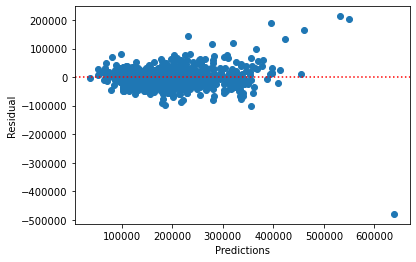

In [292]:
# Residual analysis
residuals = y_train - y_pred_train

plt.scatter( y_pred_train , residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

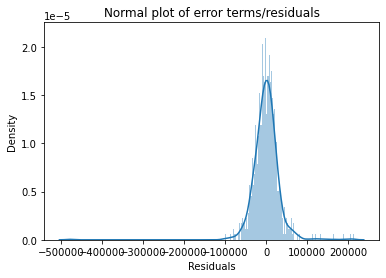

In [293]:
# Distribution of errors
p = sns.distplot(residuals, bins=400, kde=True)

p = plt.title('Normal plot of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Normal plot looks OK, except for a long left tail
### Residual also have 0 mean and distributed randomly across predicted values, there are some outliers for sure

#### Let's Move to  Ridge & Lasso


#### Model no. 4 with Ridge Regression

In [294]:
# Let's pass a range of differen alphas to test whcih leads to optimum result in terms of mae
# if too low and will not handle the overfitting, too high will be an underfit

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.25,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [295]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [296]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.88686069e+02  1.19324129e+04  1.78489889e+04  1.02826110e+04
  1.00821764e+04  1.72252178e+04  1.85162509e+04  2.82467307e+04
  3.84576300e+04 -1.83182111e+03  3.85275740e+04  1.82212743e+04
  2.25504800e+03  3.11626066e+04  1.04596468e+04  7.30801598e+03
 -9.93147037e+03  2.77590473e+04  2.01706813e+04  2.95804149e+04
  1.58729098e+04  1.24537520e+04  2.44949727e+03  1.50023834e+03
  7.80162056e+03  7.25860495e+03  1.33946926e+03 -2.85333248e+02
 -6.02914165e+03  4.08280423e+01  7.66752723e+02  2.26400171e+03
 -7.30239050e+02  4.82337592e+03  2.54224982e+03 -1.70166469e+03
 -2.65535055e+03 -3.79973816e+03 -1.01754045e+04 -6.96978245e+03
 -4.03426683e+03 -6.75838615e+03  4.27706246e+03  4.35778383e+03
  7.27621178e+03  9.87977888e+02  5.58265103e+02  2.78569804e+03
 -5.79886164e+03  8.68581162e+02  7.92155133e+03  9.39379282e+03
  1.20242301e+04 -2.84582738e+03  1.13927119e+04 -9.24570269e+03
 -2.53101922e+03 -2.57185972e+03  5.62977783e+03  3.40244095e+03
 -1.05835563e+03 -2.03710

In [297]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test:     ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test:     ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test:     ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test:     ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 Score for Training:  0.8976285067496429
R2 Score for Test:      0.8573988115842437

RSS for Training:  653201664083.2285
RSS for Test:      401951756630.33936

MSE for Training:  639766566.1931719
MSE for Test:      917698074.4984916

RMSE for Training:  25293.607219872214
RMSE for Test:      30293.5318921134


In [298]:
# let's  see all features with non-zero coefficients
# print(lasso.coef_)
# print(X_train.columns)

Ridge1_param = pd.DataFrame()
Ridge1_param['features'] = list(X_train.columns)
Ridge1_param['coef'] = ridge.coef_
Ridge1_param['coef_abs'] = abs(ridge.coef_)

Df_1 = Ridge1_param.sort_values(by=['coef_abs'], ascending=False)
Df_1 = Df_1[Df_1['coef_abs'] > 0]
len(Df_1['features'])

527

In [299]:
Df_1

,features,coef,coef_abs
118,OverallQual_10,39225.890400,39225.890400
10,GrLivArea,38527.573952,38527.573952
8,2ndFlrSF,38457.629995,38457.629995
74,Neighborhood_NoRidge,33951.233401,33951.233401
117,OverallQual_9,31827.799490,31827.799490
...,...,...,...
305,RoofMatl_Metal,-23.629556,23.629556
77,Neighborhood_SWISU,-21.899838,21.899838
257,YearRemodAdd_1970,-15.228507,15.228507
435,GarageYrBlt_1949.0,-10.341084,10.341084


In [300]:
Df_1.iloc[0:10, 0:3]

,features,coef,coef_abs
118,OverallQual_10,39225.890400,39225.890400
10,GrLivArea,38527.573952,38527.573952
8,2ndFlrSF,38457.629995,38457.629995
74,Neighborhood_NoRidge,33951.233401,33951.233401
117,OverallQual_9,31827.799490,31827.799490
13,FullBath,31162.606637,31162.606637
19,GarageCars,29580.414934,29580.414934
7,1stFlrSF,28246.730736,28246.730736
17,TotRmsAbvGrd,27759.047343,27759.047343
309,RoofMatl_WdShngl,27556.614557,27556.614557


### As a test we will see what happens if we double aplha from optimal 10 to 20

In [301]:
#Fitting Ridge model for double alpha = 20 and looking at model changes
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.04834510e+03  8.20794806e+03  1.55041696e+04  8.96169712e+03
  7.02058953e+03  1.55762760e+04  1.59270619e+04  2.29074883e+04
  2.83462627e+04 -9.68288331e+02  3.01684692e+04  1.42897631e+04
  1.20120049e+03  2.66189107e+04  1.06353388e+04  7.57921684e+03
 -6.32611871e+03  2.53022815e+04  2.17303961e+04  2.53394326e+04
  1.72985767e+04  1.18671624e+04  4.21384235e+03  8.20656332e+02
  4.39576607e+03  5.68341884e+03  1.95233383e+03 -4.34755117e+02
 -6.99103301e+03  1.45115055e+02  4.84802473e+02  2.36890601e+03
  1.35030124e+03  5.37019916e+03  2.82002683e+03 -2.32099916e+03
 -2.47560697e+03 -3.28862454e+03 -9.15615477e+03 -5.99422344e+03
 -3.09237624e+03 -5.16549464e+03  3.34845022e+03  2.50779553e+03
  6.38040122e+03 -2.07848626e+03  1.24279962e+03  2.57851424e+03
 -3.49385144e+03 -5.65513368e+02  4.78212212e+03  6.68928162e+03
  8.43750198e+03 -1.53360846e+03  1.01766912e+04 -7.39270630e+03
 -1.37919827e+03 -2.53101356e+03  4.81223415e+03  2.05781232e+03
 -3.44101216e+02 -1.29723

In [302]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test:     ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test:     ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test:     ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test:     ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 Score for Training:  0.8798023647821736
R2 Score for Test:      0.8479592298050945

RSS for Training:  766944906734.368
RSS for Test:      428559224072.4935

MSE for Training:  751170329.8083918
MSE for Test:      978445717.0604875

RMSE for Training:  27407.48674739061
RMSE for Test:      31280.116960466876


In [303]:
# let's  see all features with non-zero coefficients
# print(ridge.coef_)
# print(X_train.columns)

Ridge1_param = pd.DataFrame()
Ridge1_param['features'] = list(X_train.columns)
Ridge1_param['coef'] = ridge.coef_
Ridge1_param['coef_abs'] = abs(ridge.coef_)

Df_1 = Ridge1_param.sort_values(by=['coef_abs'], ascending=False)
Df_1 = Df_1[Df_1['coef_abs'] > 0]
len(Df_1['features'])

527

In [304]:
Df_1

,features,coef,coef_abs
118,OverallQual_10,30376.361332,30376.361332
10,GrLivArea,30168.469156,30168.469156
74,Neighborhood_NoRidge,29175.295408,29175.295408
8,2ndFlrSF,28346.262747,28346.262747
117,OverallQual_9,26881.591256,26881.591256
...,...,...,...
510,MoSold_3,33.471273,33.471273
451,GarageYrBlt_1965.0,-31.729409,31.729409
419,GarageYrBlt_1931.0,-30.871940,30.871940
267,YearRemodAdd_1980,29.333423,29.333423


In [305]:
Df_1.iloc[0:10, 0:3]

,features,coef,coef_abs
118,OverallQual_10,30376.361332,30376.361332
10,GrLivArea,30168.469156,30168.469156
74,Neighborhood_NoRidge,29175.295408,29175.295408
8,2ndFlrSF,28346.262747,28346.262747
117,OverallQual_9,26881.591256,26881.591256
13,FullBath,26618.910710,26618.910710
19,GarageCars,25339.432612,25339.432612
17,TotRmsAbvGrd,25302.281537,25302.281537
7,1stFlrSF,22907.488289,22907.488289
18,Fireplaces,21730.396145,21730.396145


#### We see progress with using Ridge
- The R2 scores have improved, the train vs test difference is lower
- The RMS error for train and test are close


In [306]:
# RFE to Selected  features using Ridge regression instead of LR
# RFE with 100 features
alpha = 10
ridge = Ridge(alpha=alpha)
rfe1 = RFE(ridge, n_features_to_select=100, verbose=0)

# Fit with 100 features
rfe1.fit(X_train, y_train)

# Print the results
rfe2 = pd.DataFrame()

rfe2['columns'] = X_train.columns
rfe2['suppport'] = rfe1.support_
rfe2['ranking'] = rfe1.ranking_
rfe2[rfe2['suppport']==True]

,columns,suppport,ranking
1,LotArea,True,1
2,MasVnrArea,True,1
3,BsmtFinSF1,True,1
4,BsmtFinSF2,True,1
5,BsmtUnfSF,True,1
...,...,...,...
499,GarageQual_Fa,True,1
500,GarageQual_Gd,True,1
517,MoSold_10,True,1
529,SaleType_New,True,1


In [307]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
X_train_r = X_train[list(rfe2[rfe2['suppport']==True]['columns'])]
X_test_r = X_test[list(rfe2[rfe2['suppport']==True]['columns'])]
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_r, y_train)

y_pred_train = ridge.predict(X_train_r)
y_pred_test = ridge.predict(X_test_r)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test:     ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test:     ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)

metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test:     ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test:     ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 Score for Training:  0.8852743475137181
R2 Score for Test:      0.8598483190489533

RSS for Training:  732029833088.4421
RSS for Test:      395047299246.3756

MSE for Training:  716973391.8593948
MSE for Test:      901934473.1652411

RMSE for Training:  26776.35882377204
RMSE for Test:      30032.223913077785


### The R2 score & RMS Error terms are much closer for Test & training, this seems like a good model

### let's try Ridge with 50 features

In [308]:
# RFE with Selected  features uisng Ridge regression instaed of LR
# RFE with 100 features
alpha = 10
ridge = Ridge(alpha=alpha)
rfe1 = RFE(ridge, n_features_to_select=50, verbose=0)

# Fit with 50 features
rfe1.fit(X_train, y_train)

# Print the results
rfe2 = pd.DataFrame()

rfe2['columns'] = X_train.columns
rfe2['suppport'] = rfe1.support_
rfe2['ranking'] = rfe1.ranking_
rfe2[rfe2['suppport']==True]

,columns,suppport,ranking
2,MasVnrArea,True,1
3,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
10,GrLivArea,True,1
11,BsmtFullBath,True,1
13,FullBath,True,1
14,HalfBath,True,1


In [309]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
X_train_r = X_train[list(rfe2[rfe2['suppport']==True]['columns'])]
X_test_r = X_test[list(rfe2[rfe2['suppport']==True]['columns'])]
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_r, y_train)

y_pred_train = ridge.predict(X_train_r)
y_pred_test = ridge.predict(X_test_r)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test:     ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test:     ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)

metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test:     ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test:     ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 Score for Training:  0.858699785903107
R2 Score for Test:      0.8524037178673781

RSS for Training:  901594106453.8975
RSS for Test:      416031489880.3424

MSE for Training:  883050055.2927498
MSE for Test:      949843584.201695

RMSE for Training:  29716.158151631073
RMSE for Test:      30819.532511082885


###  We see that the Training and Test data peformance scores are very similar




### Now let's move to using Lasso regression
### First find the right Lambda, to adjust the Beta coeff.
### Lasso has the added advantage that some coeff. can move to zero, effectively acting as Feature Selection

In [310]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.25,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [311]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [312]:
#Fitting Ridge model for alpha = 100 and printing coefficients ,
# here coefficeints have been altered to prevent overfitting
alpha = 100
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00000000e+00  2.94037671e+03  8.37817215e+03  0.00000000e+00
  0.00000000e+00  4.57465007e+03  0.00000000e+00  0.00000000e+00
  2.55924522e+04 -5.33119769e+03  2.27767730e+05  2.12562667e+04
  0.00000000e+00  2.41185526e+04  3.92549515e+03 -0.00000000e+00
 -3.42031326e+04  0.00000000e+00  1.15843704e+04  4.32663576e+04
  0.00000000e+00  4.75960087e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.37196259e+03 -0.00000000e+00  0.00000000e+00
 -4.05618206e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.29948572e+03 -0.00000000e+00
 -0.00000000e+00 -9.44274970e+02  0.00000000e+00  0.00000000e+00
  5.75448534e+03 -0.00000000e+00  0.00000000e+00  2.04266199e+03
 -2.96072482e+03  0.00000000e+00  5.66752358e+03  9.22523189e+03
  1.05956669e+04 -0.00000000e+00  1.19035348e+04 -3.40999830e+03
 -0.00000000e+00 -4.62947389e+01  4.47229583e+02  3.41978288e+03
 -0.00000000e+00  0.00000

In [313]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test: ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test: ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

metric2

R2 Score for Training:  0.9084072805988124
R2 Score for Test:  0.8563112954833194

RSS for Training:  584425554723.998
RSS for Test:  405017151890.9721

MSE for Training:  572405048.7012713
MSE for Test:  924696693.8150048

RMSE for Training:  23924.98795613639
RMSE for Test:  30408.825919706353


[0.9084072805988124,
 0.8563112954833194,
 584425554723.998,
 405017151890.9721,
 23924.98795613639,
 30408.825919706353]

In [314]:
# let's  see all features with non-zero coefficients
# print(lasso.coef_)
# print(X_train.columns)

Lasso1_param = pd.DataFrame()
Lasso1_param['features'] = list(X_train.columns)
Lasso1_param['coef'] = lasso.coef_
Lasso1_param['coef_abs'] = abs(lasso.coef_)

Df_1 = Lasso1_param.sort_values(by=['coef_abs'], ascending=False)
Df_1 = Df_1[Df_1['coef_abs'] > 0]
len(Df_1['features'])

134

In [315]:
Df_1

,features,coef,coef_abs
10,GrLivArea,227767.729635,227767.729635
95,Condition2_PosN,-187732.083091,187732.083091
118,OverallQual_10,92897.014647,92897.014647
309,RoofMatl_WdShngl,75457.126656,75457.126656
117,OverallQual_9,70828.087744,70828.087744
...,...,...,...
386,Electrical_SBrkr,298.540343,298.540343
340,MasVnrType_None,257.686823,257.686823
344,ExterQual_TA,-251.156241,251.156241
348,ExterCond_TA,201.994256,201.994256


In [316]:
Df_1.iloc[0:10,0:3]

,features,coef,coef_abs
10,GrLivArea,227767.729635,227767.729635
95,Condition2_PosN,-187732.083091,187732.083091
118,OverallQual_10,92897.014647,92897.014647
309,RoofMatl_WdShngl,75457.126656,75457.126656
117,OverallQual_9,70828.087744,70828.087744
19,GarageCars,43266.357603,43266.357603
74,Neighborhood_NoRidge,36632.773399,36632.773399
16,KitchenAbvGr,-34203.132561,34203.132561
116,OverallQual_8,32298.432193,32298.432193
8,2ndFlrSF,25592.452164,25592.452164


#### Let's build a test model with double the optimal alpha


In [317]:
#Fitting Ridge model for alpha = 100 and printing coefficients ,
# here coefficeints have been altered to prevent overfitting
alpha = 200
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00000000e+00  0.00000000e+00  2.30819163e+03  0.00000000e+00
  0.00000000e+00  1.30069669e+03  0.00000000e+00  0.00000000e+00
  1.68005914e+04 -0.00000000e+00  2.11187257e+05  1.54048683e+04
  0.00000000e+00  2.24381407e+04  5.00054707e+03  0.00000000e+00
 -2.60587736e+04  0.00000000e+00  1.74762950e+04  4.59769167e+04
  0.00000000e+00  3.25406845e+03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  9.02223452e+02 -0.00000000e+00  0.00000000e+00
 -5.39641258e+03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.07909526e+03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.48236505e+03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.52792335e+03
  5.70639941e+03 -0.00000000e+00  1.22385822e+04 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000

In [318]:
# Lets see how model performance some metrics such as R2 score, RSS and RMSE chnage with aplha changed 100 > 200
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test: ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test: ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

metric2

R2 Score for Training:  0.8877810606131872
R2 Score for Test:  0.856322959758456

RSS for Training:  716035251824.0266
RSS for Test:  404984273652.48737

MSE for Training:  701307788.2703493
MSE for Test:  924621629.3435785

RMSE for Training:  26482.21645312849
RMSE for Test:  30407.59163997666


[0.8877810606131872,
 0.856322959758456,
 716035251824.0266,
 404984273652.48737,
 26482.21645312849,
 30407.59163997666]

In [319]:
# let's  see all features with non-zero coefficients
# print(lasso.coef_)
# print(X_train.columns)

Lasso1_param = pd.DataFrame()
Lasso1_param['features'] = list(X_train.columns)
Lasso1_param['coef'] = lasso.coef_
Lasso1_param['coef_abs'] = abs(lasso.coef_)

Df_1 = Lasso1_param.sort_values(by=['coef_abs'], ascending=False)
Df_1 = Df_1[Df_1['coef_abs'] > 0]
len(Df_1['features'])

96

#### With Lasso across all features, we see improved R2 Score for Train and Test
#### Although test vs train difference is higher tha our final Ridge model

In [320]:
# let's  see all features with non-zero coefficients
# print(lasso.coef_)
# print(X_train.columns)

Lasso1_param = pd.DataFrame()
Lasso1_param['features'] = list(X_train.columns)
Lasso1_param['coef'] = lasso.coef_
Lasso1_param['coef_abs'] = abs(lasso.coef_)

Df_1 = Lasso1_param.sort_values(by=['coef_abs'], ascending=False)
Df_1 = Df_1[Df_1['coef_abs'] > 0]
len(Df_1['features'])

96

In [321]:
Df_1.iloc[0:10,0:3]

,features,coef,coef_abs
10,GrLivArea,211187.256712,211187.256712
118,OverallQual_10,86593.746706,86593.746706
117,OverallQual_9,73753.477970,73753.477970
95,Condition2_PosN,-63794.635208,63794.635208
19,GarageCars,45976.916731,45976.916731
309,RoofMatl_WdShngl,41147.912978,41147.912978
74,Neighborhood_NoRidge,38388.821187,38388.821187
116,OverallQual_8,34342.139291,34342.139291
16,KitchenAbvGr,-26058.773649,26058.773649
75,Neighborhood_NridgHt,23292.522125,23292.522125


In [322]:
Lasso1_param.sort_values(by=['coef_abs'], ascending=False)

,features,coef,coef_abs
10,GrLivArea,211187.256712,211187.256712
118,OverallQual_10,86593.746706,86593.746706
117,OverallQual_9,73753.477970,73753.477970
95,Condition2_PosN,-63794.635208,63794.635208
19,GarageCars,45976.916731,45976.916731
...,...,...,...
206,YearBuilt_1979,-0.000000,0.000000
205,YearBuilt_1978,-0.000000,0.000000
204,YearBuilt_1977,-0.000000,0.000000
203,YearBuilt_1976,-0.000000,0.000000


In [323]:
Df_1 = Lasso1_param.sort_values(by=['coef_abs'], ascending=False)

In [324]:
Df_1 = Df_1[Df_1['coef_abs'] > 0]

In [325]:
feature_lst = list(Df_1.features)

#### Let's try another Lasso model,this time we will restrict to only those 
#### features with non zero coefficients from the first Lasso model we creaeted

In [326]:
#Fitting Ridge model for alpha = 100 and printing coefficients ,
# here coefficeints have been altered to prevent overfitting
alpha = 100
lasso2 = Lasso(alpha=alpha)

X_train_l = X_train[feature_lst]

lasso2.fit(X_train_l, y_train)
print(lasso2.coef_)

[ 2.13453805e+05  9.17697660e+04  7.17029759e+04 -1.85285723e+05
  4.51317758e+04  6.22370586e+04  3.65478532e+04  3.37784485e+04
 -3.56820322e+04  2.40164825e+04  2.54898388e+04  2.11433357e+04
  2.49083979e+04  1.23821640e+04  3.04896450e+04 -1.95326321e+04
  1.75903284e+04 -1.66655763e+04  2.11966818e+04  1.59772631e+04
  1.85053947e+04 -1.84094457e+04 -1.66700276e+04  1.29879193e+04
  1.41448303e+04  1.35112070e+04 -1.39605788e+04  1.29070589e+04
  9.20560418e+03  1.06059604e+04  6.71246289e+03  9.51714564e+03
 -1.19925646e+04 -8.88418875e+03 -9.66739080e+03 -8.59667758e+03
 -9.20782846e+03  5.57708754e+03 -6.90580742e+03 -9.61013745e+03
  6.00596783e+03 -8.13206107e+03 -5.22836262e+03 -9.98924756e+03
  1.01378557e+04  8.63729185e+03 -7.80283545e+03  8.53046759e+03
 -5.70106944e+03 -7.11394837e+03 -6.64268230e+03  5.30928299e+03
  5.16692575e+03 -5.88381438e+03 -4.83142612e+03  3.68120938e+03
  1.23092367e+04 -6.80106599e+03  7.49659669e+03 -2.40708854e+03
 -6.29951373e+03  6.17696

In [327]:
Lasso2_param = pd.DataFrame()
Lasso2_param['features'] = list(X_train_l.columns)
Lasso2_param['coef'] = lasso2.coef_
Lasso2_param['coef_abs'] = abs(lasso2.coef_)

Lasso2_param

,features,coef,coef_abs
0,GrLivArea,213453.805305,213453.805305
1,OverallQual_10,91769.766004,91769.766004
2,OverallQual_9,71702.975854,71702.975854
3,Condition2_PosN,-185285.723157,185285.723157
4,GarageCars,45131.775831,45131.775831
...,...,...,...
91,BsmtFinType2_Unf,1399.126314,1399.126314
92,GarageQual_Fa,-4033.932829,4033.932829
93,Exterior2nd_Stucco,-5932.338220,5932.338220
94,Neighborhood_StoneBr,10241.833533,10241.833533


#### Almost the same coefficient values and the same order as well
#### So Let's test Model Performance scores


In [328]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train_l)
X_test_l = X_test[feature_lst]
y_pred_test = lasso2.predict(X_test_l)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test: ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test: ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

metric2

R2 Score for Training:  0.9034521576925514
R2 Score for Test:  0.8560283275034898

RSS for Training:  616042701503.2386
RSS for Test:  405814757281.4058

MSE for Training:  603371891.7759439
MSE for Test:  926517710.6881411

RMSE for Training:  24563.629450387496
RMSE for Test:  30438.753435187537


[0.9034521576925514,
 0.8560283275034898,
 616042701503.2386,
 405814757281.4058,
 24563.629450387496,
 30438.753435187537]

#### A a test just one more model with , features drawn from EDA

#### Using Lasso on selected features identified using EDA

In [329]:
#Fitting Ridge model for alpha = 100 and printing coefficients ,
# The Features are already a reduced set identified using EDA
alpha = 100
lasso3 = Lasso(alpha=alpha)


lasso3.fit(X_train3, y_train)
print(lasso2.coef_)

[ 2.13453805e+05  9.17697660e+04  7.17029759e+04 -1.85285723e+05
  4.51317758e+04  6.22370586e+04  3.65478532e+04  3.37784485e+04
 -3.56820322e+04  2.40164825e+04  2.54898388e+04  2.11433357e+04
  2.49083979e+04  1.23821640e+04  3.04896450e+04 -1.95326321e+04
  1.75903284e+04 -1.66655763e+04  2.11966818e+04  1.59772631e+04
  1.85053947e+04 -1.84094457e+04 -1.66700276e+04  1.29879193e+04
  1.41448303e+04  1.35112070e+04 -1.39605788e+04  1.29070589e+04
  9.20560418e+03  1.06059604e+04  6.71246289e+03  9.51714564e+03
 -1.19925646e+04 -8.88418875e+03 -9.66739080e+03 -8.59667758e+03
 -9.20782846e+03  5.57708754e+03 -6.90580742e+03 -9.61013745e+03
  6.00596783e+03 -8.13206107e+03 -5.22836262e+03 -9.98924756e+03
  1.01378557e+04  8.63729185e+03 -7.80283545e+03  8.53046759e+03
 -5.70106944e+03 -7.11394837e+03 -6.64268230e+03  5.30928299e+03
  5.16692575e+03 -5.88381438e+03 -4.83142612e+03  3.68120938e+03
  1.23092367e+04 -6.80106599e+03  7.49659669e+03 -2.40708854e+03
 -6.29951373e+03  6.17696

In [330]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso3.predict(X_train3)
y_pred_test = lasso3.predict(X_test3)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test: ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test: ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

metric2

R2 Score for Training:  0.8191868485628404
R2 Score for Test:  0.8099497874745863

RSS for Training:  1153714258304.7493
RSS for Test:  535696915441.12476

MSE for Training:  1129984582.0810473
MSE for Test:  1223052318.3587322

RMSE for Training:  33615.24329944746
RMSE for Test:  34972.1649080913


[0.8191868485628404,
 0.8099497874745863,
 1153714258304.7493,
 535696915441.12476,
 33615.24329944746,
 34972.1649080913]

In [331]:
X_train3.head()

,GarageCars,Condition2_Norm,GarageArea,GrLivArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,KitchenQual_TA,KitchenQual_Gd,BsmtQual_TA,...,MSSubClass_90,OverallCond_9,Condition2_PosA,Condition2_PosN,HouseStyle_2.5Fin,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_StoneBr,SaleType_Con,OverallCond_3
0,0.00,1.0,0.000000,0.081860,0.141408,0.113889,0.181818,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,1.0,0.462623,0.424289,0.220458,0.231481,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,1.0,0.155148,0.201576,0.120295,0.098611,0.363636,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.25,1.0,0.179831,0.230015,0.079378,0.145602,0.181818,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.50,1.0,0.394922,0.355880,0.127169,0.202315,0.727273,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### let'sbuild a lasso model to answer Question # 3 by dropping top 5 varibles

In [332]:
print(X_train.shape)
print(X_test.shape)

(1021, 537)
(438, 537)


### Let's fit a Lasso model after dropping the most important 5 features in previous model

In [333]:
#Fitting Ridge model for alpha = 100 and printing coefficients ,
# here coefficeints have been altered to prevent overfitting
alpha = 100
lasso = Lasso(alpha=alpha)

# here we drop the top 5 variables
X_train_l2 = X_train.drop(columns=['GrLivArea', 'Condition2_PosN','OverallQual_10', 'RoofMatl_WdShngl','OverallQual_9'],inplace=False)
X_test_l2 = X_test.drop(columns=['GrLivArea', 'Condition2_PosN','OverallQual_10', 'RoofMatl_WdShngl','OverallQual_9'],inplace=False)


lasso.fit(X_train_l2, y_train)
print(lasso.coef_)

[-0.00000000e+00  8.98665913e+03  1.29536894e+04  0.00000000e+00
  1.17948303e+01  1.21222327e+04  1.46291297e+04  1.70995422e+05
  1.15218079e+05  0.00000000e+00  2.20578720e+04  2.03989405e+02
  2.62737620e+04  3.33880000e+03 -0.00000000e+00 -3.90097841e+04
  4.23100530e+03  1.21140901e+04  4.51538573e+04  0.00000000e+00
  1.22322478e+04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  5.10942797e+03 -0.00000000e+00  0.00000000e+00 -6.28461945e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -7.43632252e+01 -6.54434209e+03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  4.48585209e+03
 -0.00000000e+00  0.00000000e+00  4.61607394e+02 -1.52821932e+03
  6.82975933e+02  1.16842478e+04  1.35435390e+04  1.38890539e+04
 -0.00000000e+00  1.15492655e+04 -5.28632878e+03 -0.00000000e+00
 -7.72169797e+02  1.18236891e+03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000

In [334]:
print(X_train_l2.shape)
print(X_test_l2.shape)

(1021, 532)
(438, 532)


In [335]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_l2)
y_pred_test = lasso.predict(X_test_l2)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Training: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS for Training: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE for Training: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test: ', mse_test_lr)
print('\nRMSE for Training: ', mse_train_lr**0.5)
print('RMSE for Test: ', mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

metric2

R2 Score for Training:  0.8911237383721647
R2 Score for Test:  0.8560631510837218

RSS for Training:  694706631860.2798
RSS for Test:  405716599619.45447

MSE for Training:  680417856.8660918
MSE for Test:  926293606.4371107

RMSE for Training:  26084.820430014308
RMSE for Test:  30435.07198015327


[0.8911237383721647,
 0.8560631510837218,
 694706631860.2798,
 405716599619.45447,
 26084.820430014308,
 30435.07198015327]

In [336]:
# let's  see all features with non-zero coefficients
Lasso1_param = pd.DataFrame()
Lasso1_param['features'] = list(X_train_l2.columns)
Lasso1_param['coef'] = lasso.coef_
Lasso1_param['coef_abs'] = abs(lasso.coef_)

Df_1 = Lasso1_param.sort_values(by=['coef_abs'], ascending=False)
Df_1 = Df_1[Df_1['coef_abs'] > 0]
len(Df_1['features'])

145

In [337]:
Df_1

,features,coef,coef_abs
7,1stFlrSF,170995.421709,170995.421709
8,2ndFlrSF,115218.079334,115218.079334
18,GarageCars,45153.857263,45153.857263
73,Neighborhood_NoRidge,44451.943993,44451.943993
15,KitchenAbvGr,-39009.784089,39009.784089
...,...,...,...
526,SaleType_WD,-164.081039,164.081039
107,HouseStyle_SLvl,-91.080374,91.080374
36,MSSubClass_90,-74.363225,74.363225
63,Neighborhood_CollgCr,61.909101,61.909101


In [338]:
Df_1.iloc[0:9,0:3]

,features,coef,coef_abs
7,1stFlrSF,170995.421709,170995.421709
8,2ndFlrSF,115218.079334,115218.079334
18,GarageCars,45153.857263,45153.857263
73,Neighborhood_NoRidge,44451.943993,44451.943993
15,KitchenAbvGr,-39009.784089,39009.784089
110,OverallQual_4,-37862.116360,37862.116360
111,OverallQual_5,-35253.238259,35253.238259
109,OverallQual_3,-33727.284731,33727.284731
74,Neighborhood_NridgHt,33561.322412,33561.322412


### Summary notes on

#### Which variables are significant in predicting the price of a house, and

#### How well those variables describe the price of a house.

`_____________________________________________________________________________________________________________________________`


#### Based on the features that rank topmost in multiple models, we can say the most important faetures cover:



##### Features that related to useful area in the house:
- `GrLivArea`: Above grade (ground) living area square feet
- `1stFlrSF`: First Floor square feet
- `2ndFlrSF`: Second floor square feet
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)

##### Features that relate to Overall Quality in Material/Finish of the house:
- `OverallQual`: Rates the overall material and finish of the house, especially:
           10	Very Excellent
           9	Excellent
           8	Very Good
- `RoofMatl`: Roof material, especially
           WdShngl	Wood Shingles

##### Feature for Garage space
- `GarageCars`: Size of garage in car capacity

##### Features about the Neighborhood, the more premium/tony/happening areas will have higher prices
- `Neighborhood`: Physical locations within Ames city limits, especially
           NoRidge	Northridge
           NridgHt	Northridge Heights

##### The feature for
- `Kitchen`: Kitchens above grade/ground

##### The no. of useful bathrooms above grade/ground
- `FullBath`: Full bathrooms above grade




`We saw that some of these were seen even during EDA to be important, either thru:`
- Higher correlation for numeric features
- Box plots for Categoricals
